<a href="https://colab.research.google.com/github/CypriLepto/Basic-Sentiment-Analysis-with-TensorFlow/blob/main/bea_01_kesziroland_adattudomany_ipynb_m_solata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Erőművi villamos teljesítmény becslése lineáris regressziós modellel - #

Az itt következő notebook-ban egy adattudományi alapú esettanulmány néhány háttér számítását ismertetjük, amely egy kombinált ciklusú hőerőművi rendszer energia termelésének leírását és modellezését végzi el és a modell adatok alapján predikciókat kísérel meg nyújtani, elsősorban gépi tanulási és matematikai statisztikai alapokra építve. Ez a dolgozat prezentációs céllal jött létre és nem tartalmazza a terület teljeskörű áttekintéséhez szükséges energetikai, műszaki tudományi és a területen szükséges egyéb domain szintű ismeretek elemzésekben történő figyelembe vételét. Az itt szeerplő elemzés lineáris regressziós alapon nyugvó modelleket kísérelt meg alkalmazni egy többciklusú hőerőmű kimeneti villamos teljesítményének előrejelzésére. A regressziós számítások egyes eredményeit keresztvalidációs eljárásokkal, illetve a modell érvényességét egyéb matematikai statisztikai eljárásokkal támasztom alá.

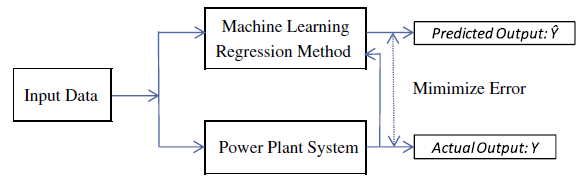

Az elemzéseket a Python programnyelven rendelkezésre álló különféle könyvtáralat, illetve IBM SPSS Statistics programcsomagot és MS Excel programokat használtam. A számítások részletei a jelen notebookkhoz  tartozó tanulmányban közölt helyeken hozzáférhetők, letölthetők és ellenőrizhetők.





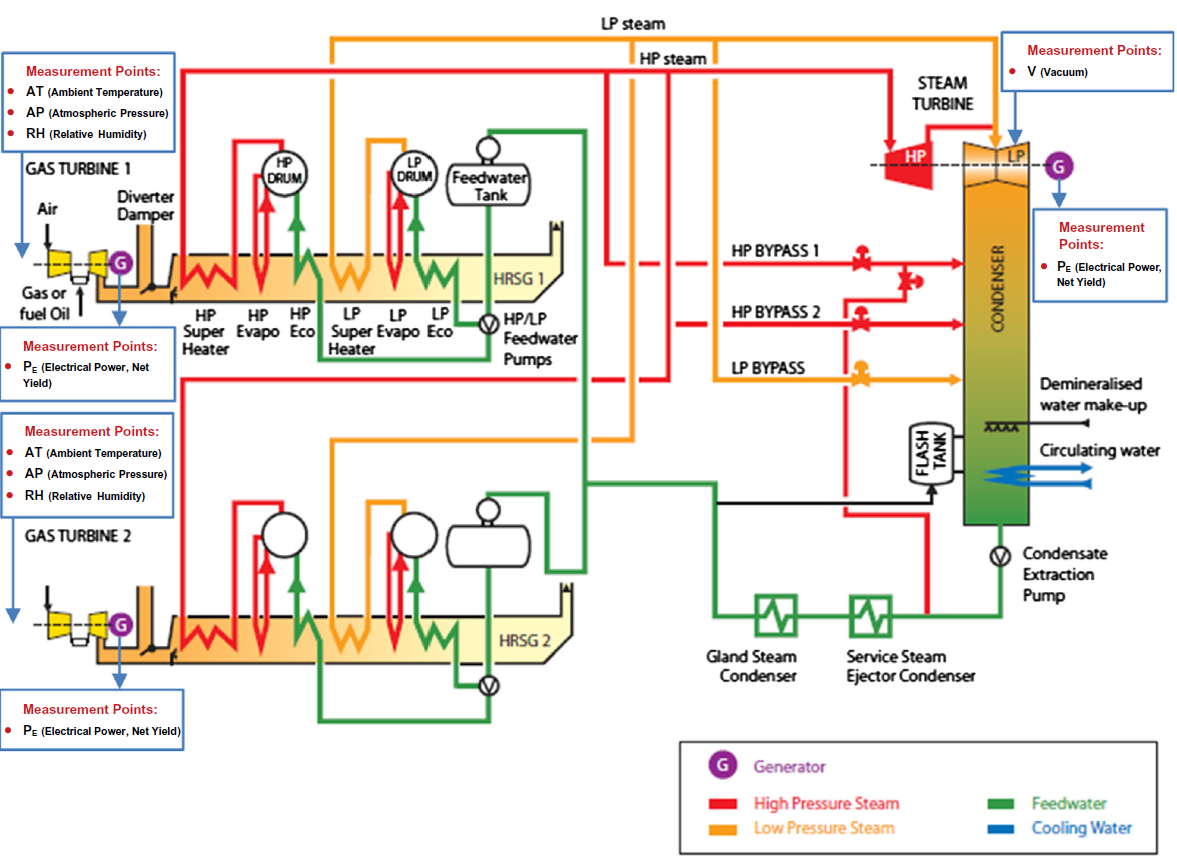

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. Eredeti XLS adatbázisok szemlézése XLS-ben, alapvető adatvizualizációk megjeleníttése
#    (kétdimenziós lineáris regresszió)
# 2. XLS->CSV transzformálás (Train_KR.xlsx->train.csv)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/PE/Bea/Bea_01/Train.xlsx')
#df = pd.read_csv('/content/drive/MyDrive/PE/Bea/Bea_01/Train_KR.csv')
df.head()
df.describe()
df.info()
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8568 non-null   float64
 1   V       8568 non-null   float64
 2   AP      8568 non-null   float64
 3   RH      8568 non-null   float64
 4   PE      8568 non-null   float64
dtypes: float64(5)
memory usage: 334.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8568 non-null   float64
 1   V       8568 non-null   float64
 2   AP      8568 non-null   float64
 3   RH      8568 non-null   float64
 4   PE      8568 non-null   float64
dtypes: float64(5)
memory usage: 334.8 KB


In [ ]:
df.tail()

,AT,V,AP,RH,PE
8563,17.10,49.69,1005.53,81.82,457.32
8564,24.73,65.34,1015.42,52.80,446.92
8565,30.44,56.24,1005.19,56.24,429.34
8566,23.00,66.05,1020.61,80.29,421.57
8567,17.75,49.25,1020.86,63.67,454.41


In [ ]:
df.dtypes #Minden változó float => nincs szükség adatranszformációra

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [ ]:
df.describe() #AP-nek kicsi a szórása, kiugró adat nincs...

NameError: name 'df' is not defined

In [ ]:
df.shape #jelenlegi dimenzió

NameError: name 'df' is not defined

In [ ]:
df[df.duplicated()].shape ##duplán mintavételezett sorok kiírása(megszámolás: 36 sor)

NameError: name 'df' is not defined

In [ ]:
df[df.duplicated()] #36 duplum volt a csv-ben... most nincs egy se!!! OK

,AT,V,AP,RH,PE
1066,10.72,41.17,1019.68,60.71,479.21
2467,7.64,41.17,1020.01,75.14,488.53
2550,25.42,75.60,1017.39,77.63,438.24
3292,12.27,41.17,1019.41,58.10,475.13
3528,24.63,59.57,1010.45,85.36,440.67
4065,8.57,41.17,1020.18,72.47,484.20
4812,25.21,75.60,1017.19,69.84,445.84
4975,7.87,41.17,1020.33,77.77,486.20
4983,6.86,41.17,1020.12,79.14,490.23
5413,28.84,75.60,1018.41,53.96,442.69


In [ ]:
df = df.drop_duplicates() #Várt eredmény 8568-36 = 8532 STIMMEL
df.shape #dumplumok eldobása utáni adatfile

(8532, 5)

In [ ]:
df.count() # df ellenőrzés: N=8532 STIMMEL

AT    8532
V     8532
AP    8532
RH    8532
PE    8532
dtype: int64

In [ ]:
df.isnull().sum() #null cellák összeszámolása: nincs null

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df = df.dropna() #default-ban a sorokat dobjuk el, ahol nincs adat (most nem releváns, mert nincs null)

In [ ]:
df.count() #most nem releváns: uaz, mint feljebb, mivel nem volt null eldobás

AT    8532
V     8532
AP    8532
RH    8532
PE    8532
dtype: int64

In [ ]:
df.isnull().sum() #ellenőrizzük, hogy van-e még nullás: nincs null

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

Text(0.5, 1.0, 'A környezeti hőmérséklet hisztogramja (Celsius)')

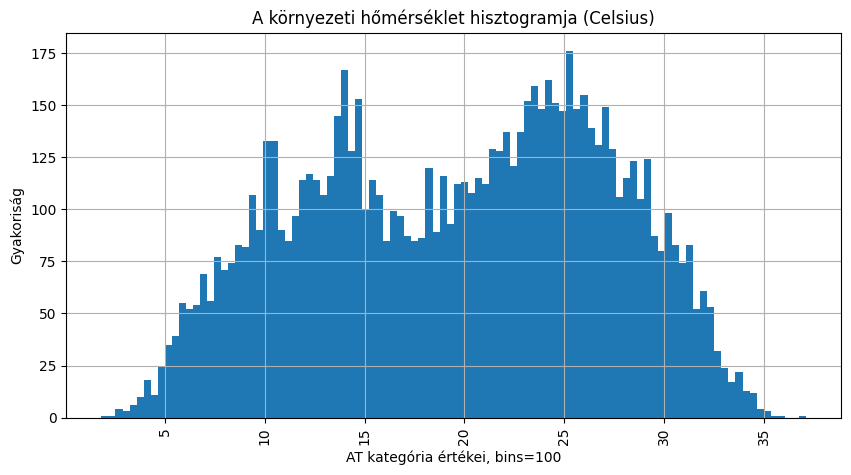

In [ ]:
df['AT'].hist(figsize=(10,5), xrot=90, bins=100) #hisztorgarm építése a AT-re (bin-ek száma megadása: most önkényes
                                                #katagória típusok száma: 50 binre állítva
                                                #hőmérsékleti csoportosulás látható az adatokon,
                                                #de ebből önmagában nem lehet következtetés levonni (pl.: évszak)
# Label-ek hozzáadása az x és y tengelyhez
plt.xlabel('AT kategória értékei, bins=100')
plt.ylabel('Gyakoriság')

# Ábra címe
plt.title('A környezeti hőmérséklet hisztogramja (Celsius)')


<Axes: >

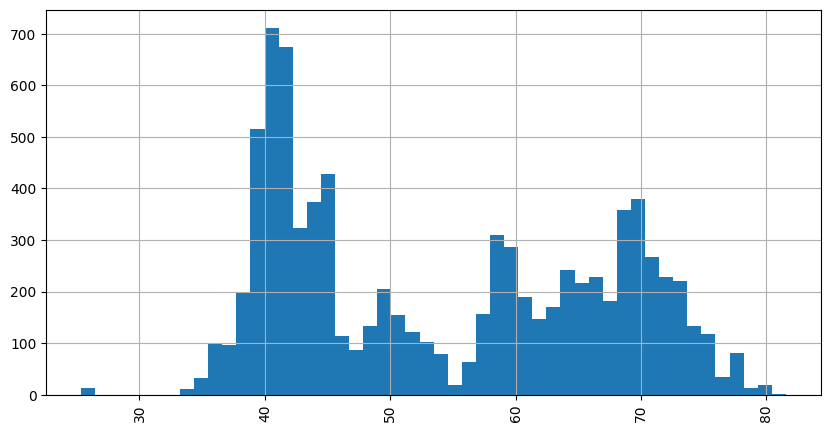

In [ ]:
df['V'].hist(figsize=(10,5), xrot=90, bins=50) #hisztorgarm építése a V-re (bin-ek száma megadása: most önkényes
# kettős csúcs a V-ben 42 és 70 körül (műszaki magyarázat szükséges: Feature Eng....  - ezt a modellbe nem építjük be)

<Axes: >

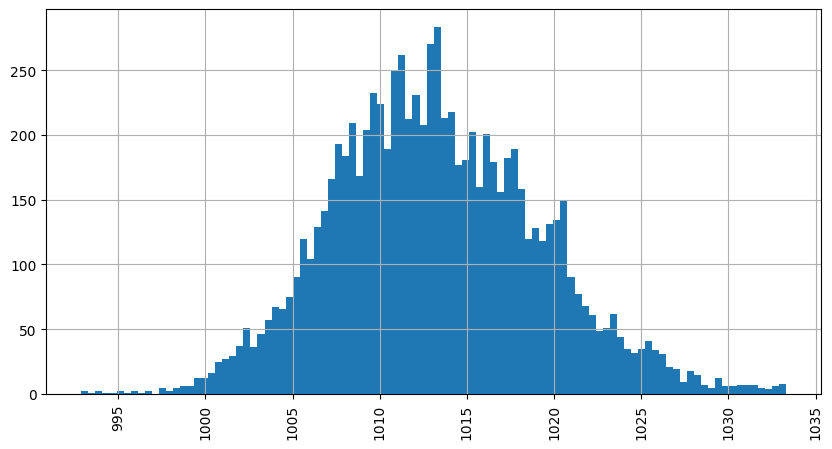

In [ ]:
df['AP'].hist(figsize=(10,5), xrot=90, bins=100) #hisztorgarm építése a AT-re (bin-ek száma megadása: Gauss eloszlás, átlag=1013.276923

<Axes: ylabel='Density'>

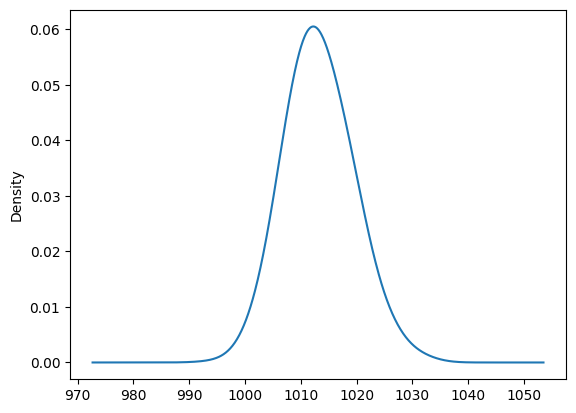

In [ ]:
df['AP'].plot.density(bw_method=0.5) # sűrűség fgv kirajzolása AP-re. method=felbontás...

Text(0.5, 1.0, 'Az erőmű teljesítmény hisztogramja (kWh)')

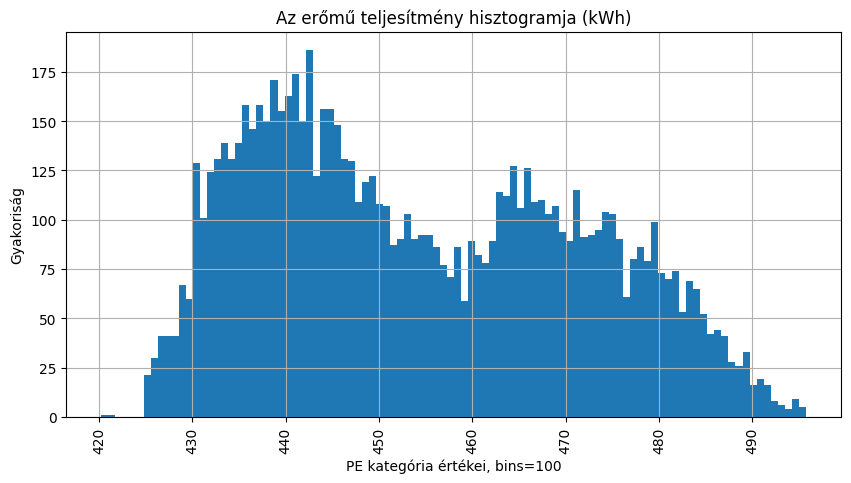

In [ ]:
df['PE'].hist(figsize=(10,5), xrot=90, bins=100) #hisztorgarm építése a PE-re
                                              #(bin-ek száma megadása: Gauss eloszlás, kettős csúcs. HIP: V-vel van kapcslaban
# Label-ek hozzáadása az x és y tengelyhez
plt.xlabel('PE kategória értékei, bins=100')
plt.ylabel('Gyakoriság')

# Ábra címe
plt.title('Az erőmű teljesítmény hisztogramja (kWh)')


<Axes: ylabel='Density'>

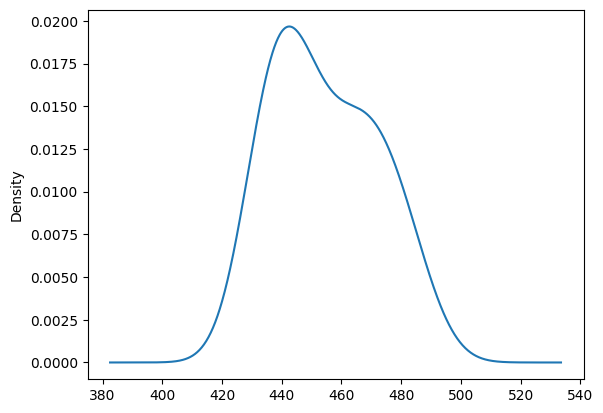

In [ ]:
df['PE'].plot.density(bw_method=0.5) # sűrűség fgv kirajzolása PE-re. method=felbontás... Itt is látszik a dupla csúcs-szerűség

## Measures of ***variability***



In [ ]:
df.describe().max() - df.describe().min() # range (ha describe-al csináljuk akkor a kategprikus vált-kat nem veszi figyelembe - most nem releváns, mert minden float)
                                          # range outlierekre érzékeny!!!!!!

AT    8530.190000
V     8519.295446
AP    8526.058433
RH    8517.463910
PE    8514.912964
dtype: float64

In [ ]:
df.var() # átlagos négyzetes eltérés az átlagtól

AT     55.570458
V     161.405693
AP     35.302220
RH    211.297909
PE    291.966814
dtype: float64

In [ ]:
df.std() # átlagos négyzetes eltérésből gyököt vonunk

AT     7.454560
V     12.704554
AP     5.941567
RH    14.536090
PE    17.087036
dtype: float64

Text(0.5, 1.0, '0...1 intervallumba transzformált PE értékekek')

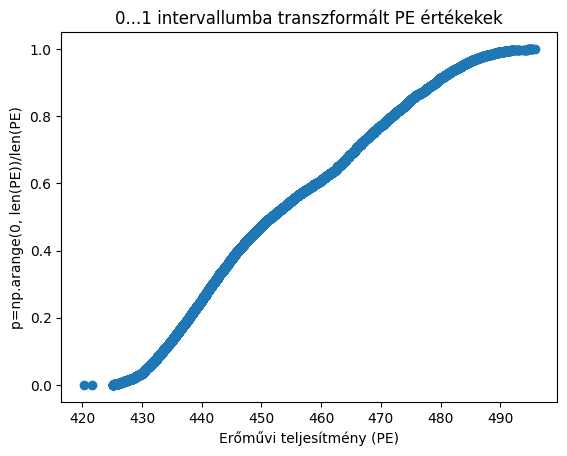

In [ ]:
#eloszlás függvény
PE = df['PE']
PE_sorted = PE.sort_values() # sorba rendezi a teljesítmény értékekeket
p = np.arange(0, len(PE))/len(PE)# valószínűségi ertékeke, amiket szeretnénk megjeleníteni
                                #0-túl egy vektor, ahány elemünk van a PE-ben (8532 van => 0-8531-ig), s azt  osztjuk a PE elemeivel
                                #így 0 -1 közé tarnszformáljuk az értékekekt=> tudjuk ábrázolni
                                #pl. ahol meredek emelkedés van, oda csoportosulnak az adatok (ezútattal nem látunk iylet)

plt.scatter(PE_sorted, p)

# Label-ek hozzáadása az x és y tengelyhez
plt.xlabel('Erőművi teljesítmény (PE)')
plt.ylabel('p=np.arange(0, len(PE))/len(PE)')

# Ábra címe
plt.title('0...1 intervallumba transzformált PE értékekek')

In [ ]:
#hogy könnyebben le tudjuk olvasni az adatokat... kvantilis...
#percentilisek: amikor nem kitüntetett helyen nézzük

PE.quantile(0.5) # 0-1 közti érték ahhoz,
# 0,1 => az adatok 10%-a kisebb, minta az adott érték
# 0,5 => medián (PE.median() -nal ellenőrizhető, hogy annyi)
#

451.725

In [ ]:
df['PE'].median() #vagyis a 0,5 a median

451.725

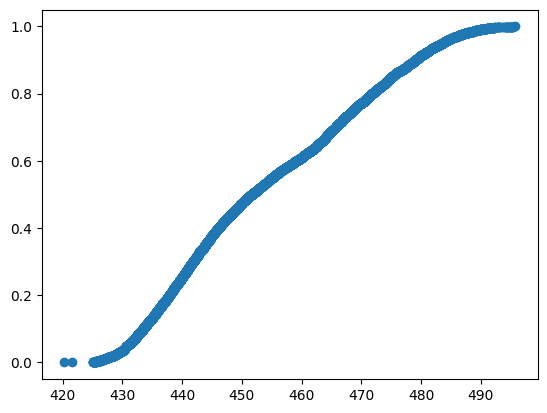

In [ ]:
PE = df['PE']
PE_sorted = PE.sort_values() # sorba rendezi a teljesítmény értékekekt
p = np.arange(0, len(PE))/len(PE)# valószínűségi ertékeke, amiket szeretnénk megjeleníteni
                                #0-túl egy vektor, ahány elemünk van a PE-ben (pl. 1043 van => 0-1042-ig), s az  osztjuk a PE eleméval
                                #így 0-1 közé tarnszformáljuk az értékekekt=> tudjuk ábrázolni
                                #pl. ahol meredek emelkedés van, oda csoportosulnak az adatok: most nem látható ilen kiugrás

plt.scatter(PE_sorted, p)

Outier-ek szűrése

Text(0.5, 1.0, 'Erőművi teljesítmény boxplot diagramja (PE)')

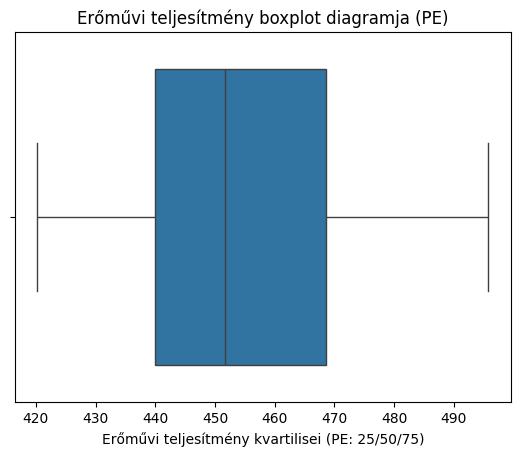

In [ ]:
sns.boxplot(x=df['PE'])
# Label-ek hozzáadása az x és y tengelyhez
plt.xlabel('Erőművi teljesítmény kvartilisei (PE: 25/50/75)')
#plt.ylabel('p=np.arange(0, len(PE))/len(PE)')

# Ábra címe
plt.title('Erőművi teljesítmény boxplot diagramja (PE)')

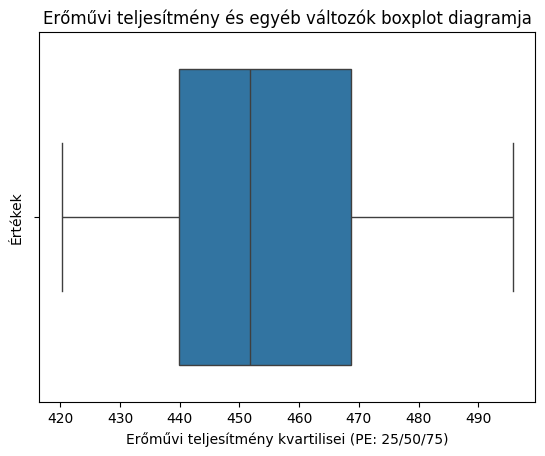

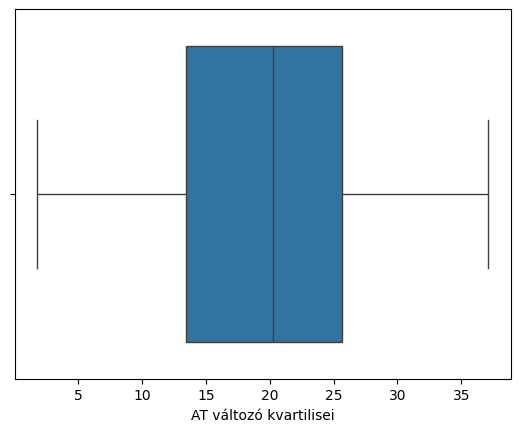

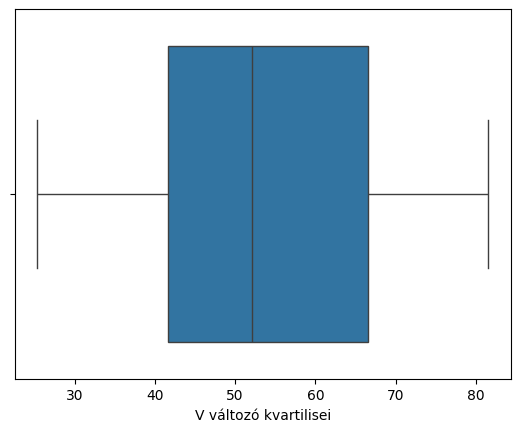

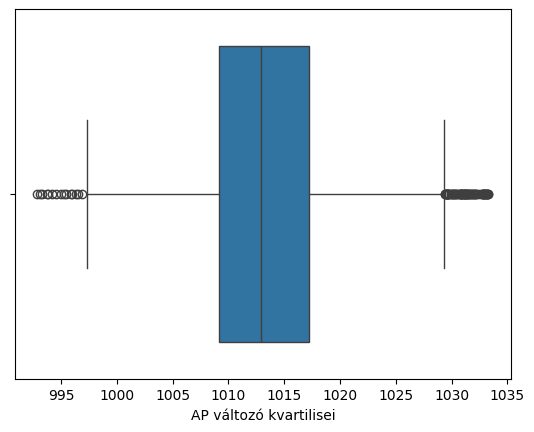

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Eredeti boxplot
sns.boxplot(x=df['PE'])

# Label-ek hozzáadása az x és y tengelyhez
plt.xlabel('Erőművi teljesítmény kvartilisei (PE: 25/50/75)')
plt.ylabel('Értékek') # Ezt hagytam ki a korábbi kódból, hogy általánosabb legyen

# Ábra címe
plt.title('Erőművi teljesítmény és egyéb változók boxplot diagramja')

# AT változó boxplotja
plt.figure()  # Új ábra létrehozása
sns.boxplot(x=df['AT'])
plt.xlabel('AT változó kvartilisei')

# V változó boxplotja
plt.figure()  # Új ábra létrehozása
sns.boxplot(x=df['V'])
plt.xlabel('V változó kvartilisei')

# AP változó boxplotja
plt.figure()  # Új ábra létrehozása
sns.boxplot(x=df['AP'])
plt.xlabel('AP változó kvartilisei')

plt.show()

In [ ]:
#outlierek 25-75-ön kvüli értékekek
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

AT    12.200
V     24.840
AP     8.105
RH    21.350
PE    28.765
dtype: float64

In [ ]:
UW = Q3 + 1.5*IQR # két bajusz kiszámolása: upper
LW = Q1 - 1.5*IQR # két bajusz kiszámolása: lower
print([UW, LW])

# ezekkel most nem foglalkozunk....

[AT      43.970
V      103.770
AP    1029.390
RH     116.905
PE     511.780
dtype: float64, AT     -4.830
V       4.410
AP    996.970
RH     31.505
PE    396.720
dtype: float64]


In [ ]:
((df < LW) | (df > UW)).any(axis=1) # a korláton kívül esőkkel nem foglalkozunk: VAGY kapcs

0       False
1       False
2       False
3       False
4       False
        ...  
8563    False
8564    False
8565    False
8566    False
8567    False
Length: 8532, dtype: bool

In [ ]:
df = df[~((df < LW) | (df > UW)).any(axis=1)] # ezt csomagoljuk df-be: nem az outlierek=>negáljuk... a 8440 adatpont maradt
df.shape

(8440, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8440 entries, 0 to 8567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8440 non-null   float64
 1   V       8440 non-null   float64
 2   AP      8440 non-null   float64
 3   RH      8440 non-null   float64
 4   PE      8440 non-null   float64
dtypes: float64(5)
memory usage: 395.6 KB


In [ ]:
quantile_x = np.arange(0, 1.1, 0.1) # quantilisek listába szervezése
PE_qs = []
for q in quantile_x:
  PE_qs.append(PE.quantile(q)) # - töltögetem a listát
print(PE_qs)

price_qs = []
for q in quantile_x:
  price_qs.append(df['PE'].quantile(q))
print(price_qs)

[420.26, 433.44, 437.85, 441.83, 446.084, 451.725, 459.096, 465.714, 471.8, 479.13, 495.76]
[420.26, 433.439, 437.818, 441.724, 445.89599999999996, 451.35, 458.66, 465.453, 471.592, 479.03299999999996, 495.76]


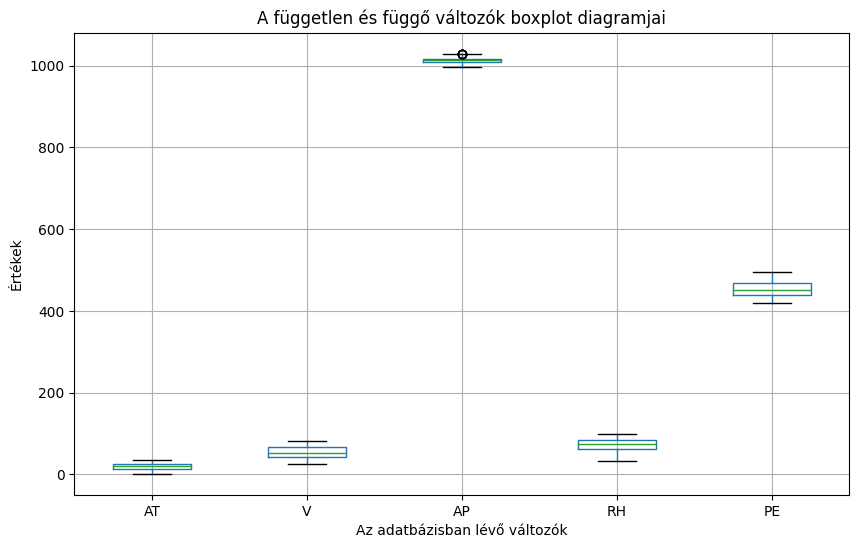

In [ ]:
# Boxplot az összes változóról egy ábrán
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('A független és függő változók boxplot diagramjai')
plt.xlabel('Az adatbázisban lévő változók')
plt.ylabel('Értékek')
plt.show()

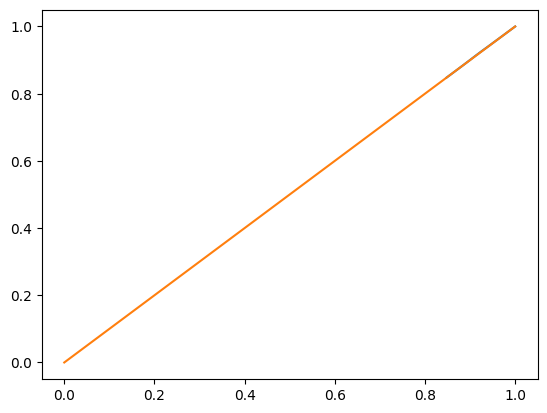

In [ ]:
#QQPLOT - - Modell hiba összevetése a normál eloszlással
#Azt szeretjük, ha a hiba normál eloszlást követ, így a normál eloszlás várható értéke nulla, vmekora szórás mellett

#Ha az eloszlások megegyeznek => egy enenesre esnek SLIDE 38 => van prdeiktív ereje adott vált-nak
plt.plot(price_qs/df['PE'].max(), PE_qs/PE.max())
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))

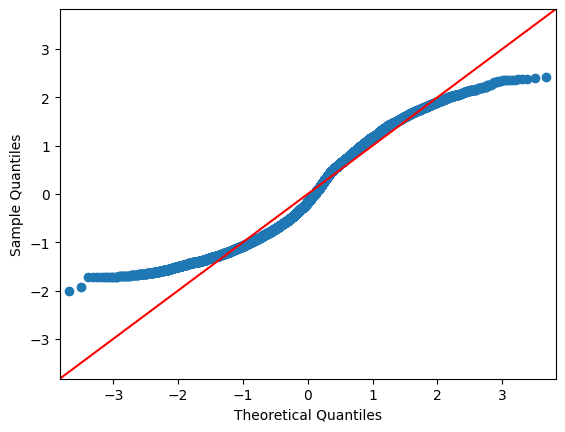

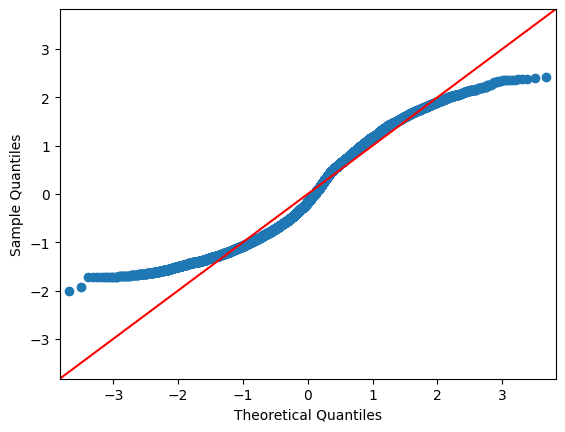

In [ ]:
import statsmodels.api as sm # stastsmodell importálása
PE_std = (PE - PE.mean())/PE.std() #telj standardizálása: erre avan beépített fgv

sm.qqplot(PE_std, line='45') # QQPLOT fg egy 45 fokossal összevetést is betesz
# ami látszik: a tartomáyn naygobb részében követi a niormál, de vannak elnyúló farkai vszleg
# talán az outlierek eldobásával hasonlítana a normál eloszlásra


Scatterplot

Text(0, 0.5, 'PE')

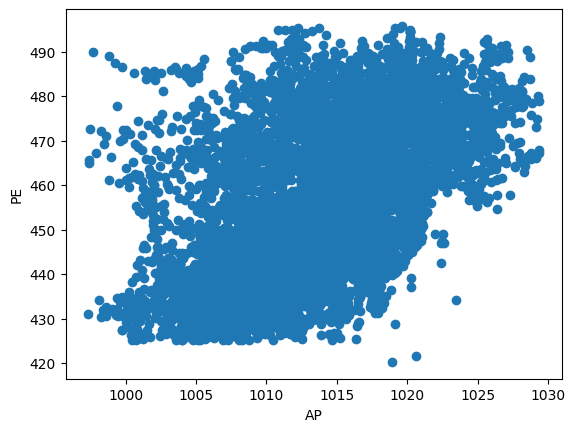

In [ ]:
#két db változót pontokban ábrázolunk
import statsmodels.api as sm # stastsmodell importálása
plt.scatter(df['AP'], df['PE'])
plt.xlabel('AP')
plt.ylabel('PE')

# eddigre már korábban megtörtént az adattisztítás...

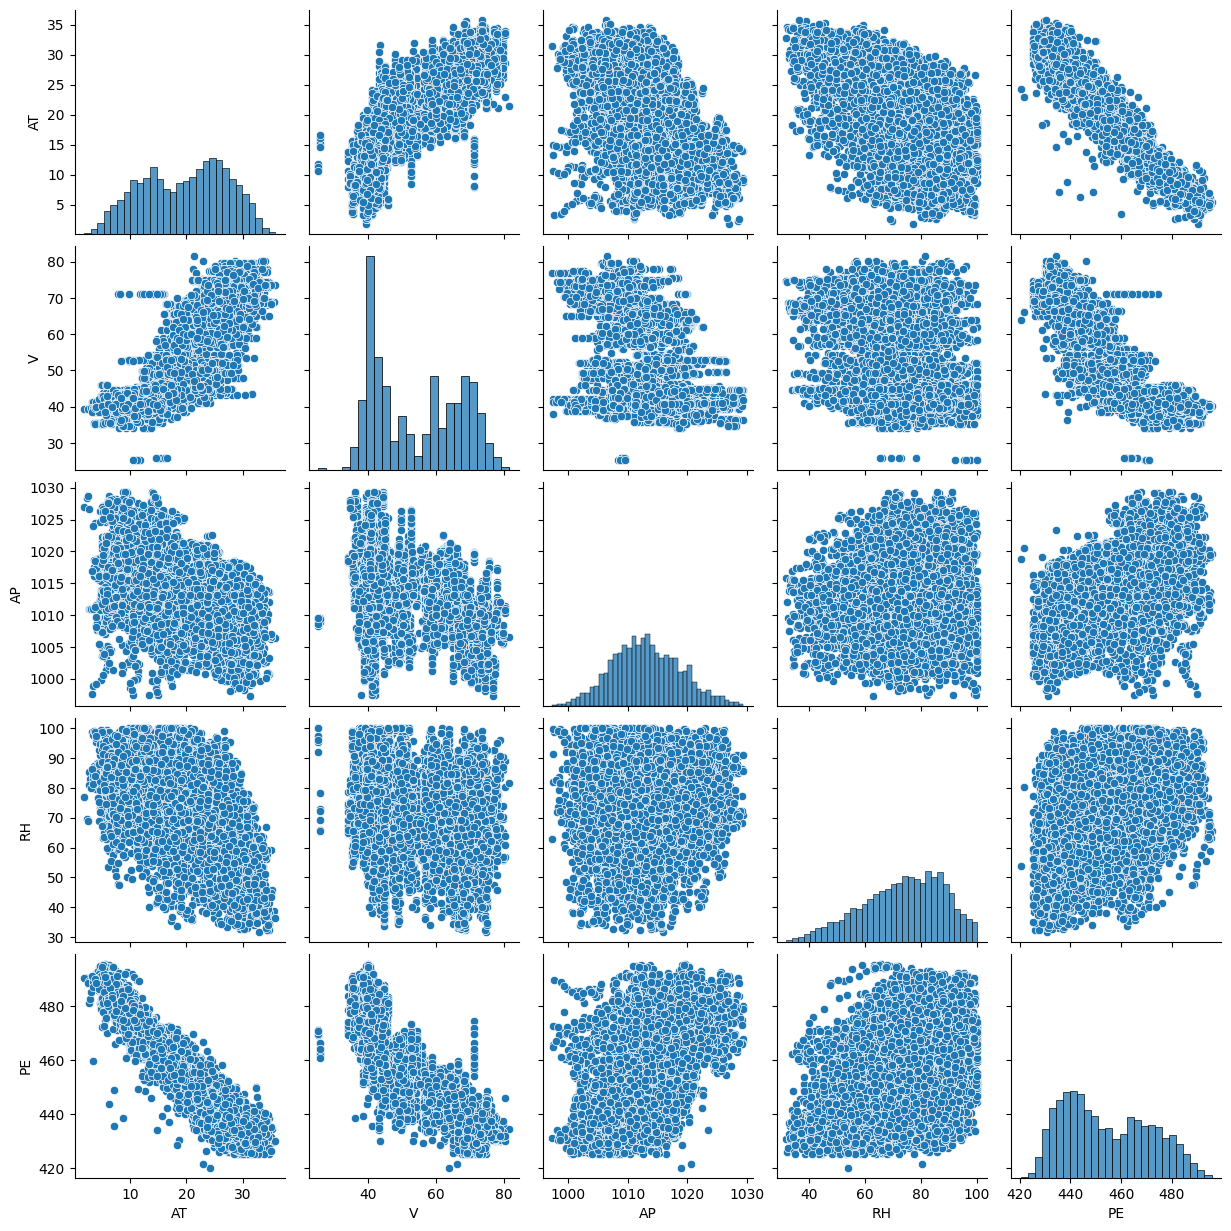

In [ ]:
#rövid értelmezés SCATTER MÁTRIX JOINT PLOT
sns.pairplot(df) # ezt mindne változó közöttre megcsináljuk, egyben

# Kép mentése jpg formátumban
#plt.savefig('pairplot.jpg', format='jpg') # ez így vszleg nemműxik a a sima mentés...

# Kép megjelenítése
#plt.show(# ez így vszleg nem műxik Colab-on... fentire alpul, de a plot jó)

**Értelemzés**: A scatter mátrix-okból egyben látszik maygarázó változók esetleges összefüggése, ami nem oksági kapcsoaltot jelent, henem itt mindössze első ránátásre értelmezett adatként tekintümnk rá.

Heat Maps

In [ ]:
#   +  pozitív kapcs... 0 nincs kapcsoalt... -1 negatív kapcsolat
# korrelációs mátrix

corr = df.corr() #egyváltozós korrrelációs összefüggések táblázatban
corr

,AT,V,AP,RH,PE
AT,1.000000,0.843064,-0.506741,-0.541525,-0.947103
V,0.843064,1.000000,-0.415373,-0.311521,-0.869257
AP,-0.506741,-0.415373,1.000000,0.101078,0.518836
RH,-0.541525,-0.311521,0.101078,1.000000,0.387827
PE,-0.947103,-0.869257,0.518836,0.387827,1.000000


<Axes: >

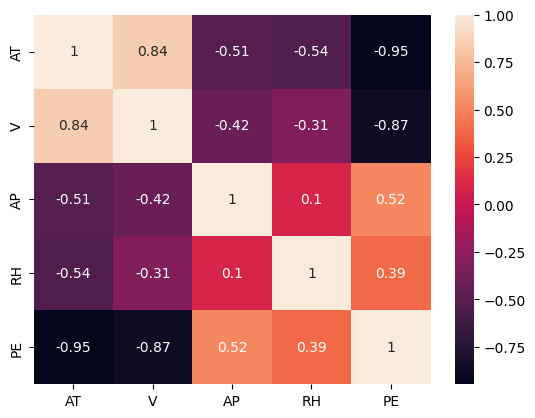

In [ ]:
# korrelációs mátrixok vizulizálása - sns-ben
# Ez csisszre egyezik az SPSS tisztítatlan adatset-tel (powerplan_bea.sav...N=8568)...
sns.heatmap(corr, annot=True)

In [ ]:
15+7 #Python fut-e teszt!!!

22

**Scatter mátrix értelmezés**e: A PE-AT és a PE-V korrelációsk szembetűnök, a többváltozós elemzés során ezeket tovább szüksége wevizsgálni.

#Lineáris regresszió számítás innen indul, felosztott train-test-tel*

In [ ]:
#Független (X) és függő változók kijelölése (y)*

#X = df.iloc[:,1:]
#y = df.iloc[:,0].values

#Fentebb a test=train felosztáselőtti állapotban dolgoztunk...
#Koábbi.............?????...amikor 30% volt a test...
X = df.iloc[:,:-1] #független változók
y = df.iloc[:, -1] #függő változó

In [ ]:
y

0       478.77
1       482.83
2       465.24
3       469.43
4       442.50
         ...  
8563    457.32
8564    446.92
8565    429.34
8566    421.57
8567    454.41
Name: PE, Length: 8440, dtype: float64

In [ ]:
#Train-test felosztás sklearn.model_selection.train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#meg kell győződni arról, h nem csak a tanítási mimntán teljesít jól a modell, hanem a való világban is.
#Ezekhez vannak kül. mutató számok.
# Train/(validation)/test felosztás (Test-et külön kezeljük,
# Amikor a train és validation alapján jónak gondoljuk, akkor telepoítjük ki)
#Azért nem tanítunk teljes adatokon, mert "OVERFITING" prb. lehet: a hibákat "ERROR" kezdjük megtanulni: ZAJT írjuk le.
#UNDERFITTING: eleve a teszt mintán is rosszul teljesít.
#FELOSZTÁS: test_size=20%

In [ ]:
print(X.shape) #flen változók
print(X_train.shape)
print(X_test.shape)
print(y.shape)#függő vált
print(y_train.shape)
print(y_test.shape)

#8440 - Teljes adathalmaz, amitnek a felosztása megtörtént
#6752 - Train --- X
#1688 - Test(Validation) --- y

(8440, 4)
(6752, 4)
(1688, 4)
(8440,)
(6752,)
(1688,)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(reg.coef_) #reg. koeficiensek("flen változó meredekségei": magyarázó változókra nézve (Béták))
print(reg.intercept_) #tengelymetszet

[-1.96677833 -0.23601626  0.0812555  -0.15722114]
435.03417544785447


In [ ]:
pd.DataFrame(reg.coef_, df.columns[:-1], columns=['reg_coef']) # tábázatba a Bétákat

#SPSS output-ok tisztítatlan adatokon
#(csak listwise szűrés volt... a regresszióban beállítva - ebből adódnak az eltéérsek):
#   AT:	-1,974
#   V:	-,237
#   AP:	,061 *--- látszik nagyobb diff, de ez sem nagy...??? ELLENŐRIZNI!!!...
#   RH:	-,158
#_________________________
#Béták az erdedeti, tisztítatlan XLS
#(Train_test.xlsx__Train fül) egyenletei alapján: *** NAGY ÉLTÉRÉSEK=>ezzel most nem szabad foglalkozni!!!***
#AT: -2,17 ***
#V: - 1.17 ***
#AP: 1,48 ***
#RH: 0,45 ***

#Regressziós egyenlet NN-el (ezeket ellenőrizgetni... majd...):
#PE3 = -2.03 * AT + 0.24 * V + 0.61 * AP + 0.45 * RH + 0.18
#itt az intercept-et meghatározni!!!

,reg_coef
AT,-1.966778
V,-0.236016
AP,0.081256
RH,-0.157221


### Regressziós modellek kiértékelése


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.


In [ ]:
#R, MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#predikálás a modellel
y_p_train = reg.predict(X_train) # train-re prdikálunk az egyenlettetel
y_p_test = reg.predict(X_test) # test-re pedikálunk

In [ ]:
MAE_train = mean_absolute_error(y_train, y_p_train)
MAE_test = mean_absolute_error(y_test, y_p_test)
print([MAE_train, MAE_test]) #kiíratjuk a train és teszt adatokat. KÖzel esnek egymáshoz=> OK
#3,63 vs. 3,67 - OK-nak tűnik, de majd lesz még keresztvalidálás is!

[3.639143744763674, 3.6791982557009195]


In [ ]:
mean_squared_error(y_train, y_p_train)

20.72873965993572

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# A RMSE kiszámításához szükséges a négyzetes gyök függvényt is importálni
from math import sqrt


# MAE kiszámítása
mae = mean_absolute_error(y_train, y_p_train)
print("Mean Absolute Error (MAE):", mae)

# MSE kiszámítása
mse = mean_squared_error(y_train, y_p_train)
print("Mean Squared Error (MSE):", mse)

# RMSE kiszámítása (MSE alapján)
rmse = sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


# R2 kiszámítása
rr = r2_score(y_train, y_p_train)
print("R2: ", rr)

Mean Absolute Error (MAE): 3.639143744763674
Mean Squared Error (MSE): 20.72873965993572
Root Mean Squared Error (RMSE): 4.55288256601636
R2:  0.9289022577113611


In [ ]:
r2_score(y_train, y_p_train)

0.9289022577113611

Neural hálózatos becslés mutatói: *** Sima LN

Mean Squared Error (MSE): 25.717763317996283 *** 20.72
Root Mean Squared Error (RMSE): 5.0712684131286405 ***???
Mean Absolute Error (MAE): 4.071174869995755 *** 3.63/3.67
R-squared (R2) Score: 0.9120723661077219 ***0.92

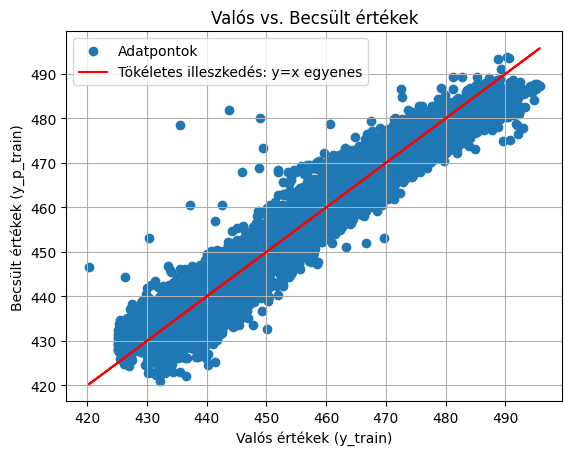

In [ ]:

import matplotlib.pyplot as plt

# Adatpontok kirajzolása
plt.scatter(y_train, y_p_train, label='Adatpontok')

# y=x egyenes kirajzolása
plt.plot(y_train, y_train, color='red', label='Tökéletes illeszkedés: y=x egyenes')

plt.xlabel('Valós értékek (y_train)')
plt.ylabel('Becsült értékek (y_p_train)')
plt.title('Valós vs. Becsült értékek')
plt.legend()
plt.grid(True)
plt.show()

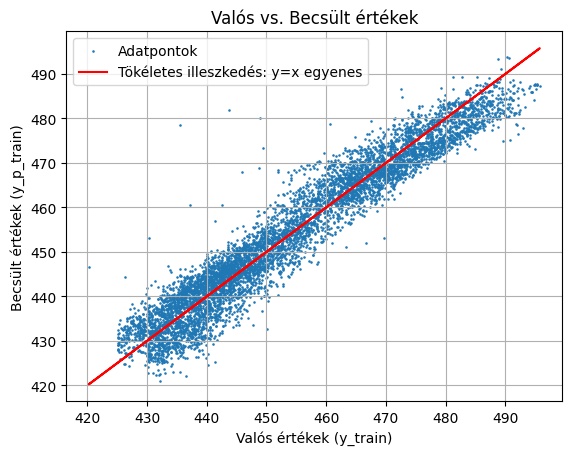

In [ ]:
import matplotlib.pyplot as plt

# Adatpontok kirajzolása,uaz, mint fent, de az adatpontok méret felére csökkentve
plt.scatter(y_train, y_p_train, label='Adatpontok', s=0.7)

# y=x egyenes kirajzolása
plt.plot(y_train, y_train, color='red', label='Tökéletes illeszkedés: y=x egyenes')

plt.xlabel('Valós értékek (y_train)')
plt.ylabel('Becsült értékek (y_p_train)')
plt.title('Valós vs. Becsült értékek')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#MAE
mean_absolute_error(y_train,y_p_train)

3.639143744763674

In [ ]:
#MSE
mean_squared_error(y_train,y_p_train)

20.72873965993572

In [ ]:
np.sqrt(mean_squared_error(y_train,y_p_train))

4.55288256601636

In [ ]:
r2_score(y_train,y_p_train)

0.9289022577113611

Adjusted $R^2$ érték:

$\bar{R}^2 = 1-(1-R^2)(\frac{N-1}{N-K})$

In [ ]:
#direktben nincs R2 a sclearn-ben => lekódoljuk...
r2ertek = r2_score(y_train,y_p_train)
N = X_train.shape[0]
K = X_train.shape[1]

adj_r2 = 1-(1-r2ertek)*((N-1)/(N-K))
print(adj_r2)

#SPSS adat: Model summary-ben: Adjusted R Square: 0,928 -CSISSZRE KIJÖN ITT IS!
#Std Erro Estimete: 4,586


0.9288706493493478


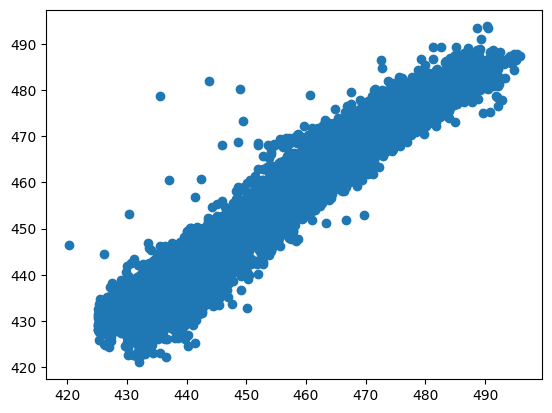

In [ ]:
plt.scatter(y_train,y_p_train)
plt.show()
#kb. egy 45 fokos szögű elipszis => ránézésre feltételezhető megfelelő illeszkedés

In [ ]:
y_test_pred = reg.predict(X_test)

In [ ]:
r2_score(y_test,y_test_pred)

0.9210917180263449

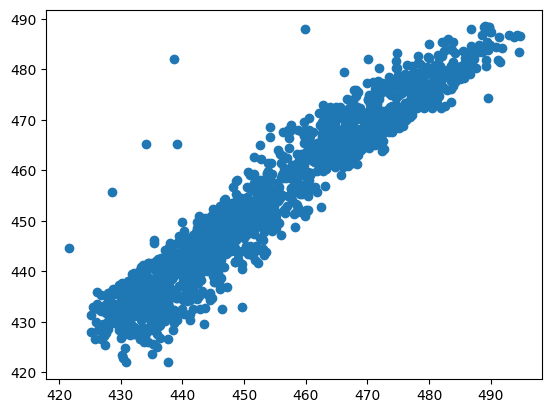

In [ ]:
plt.scatter(y_test,y_test_pred)
plt.show()

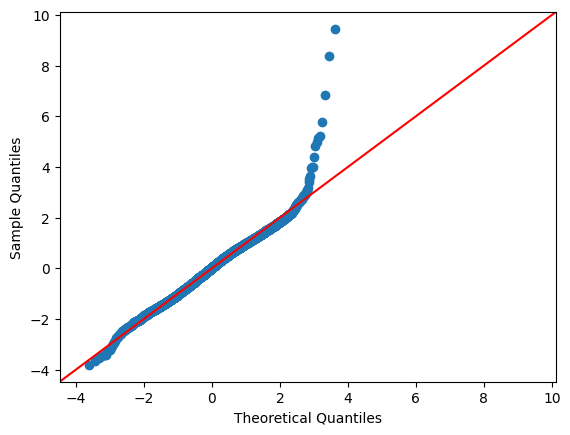

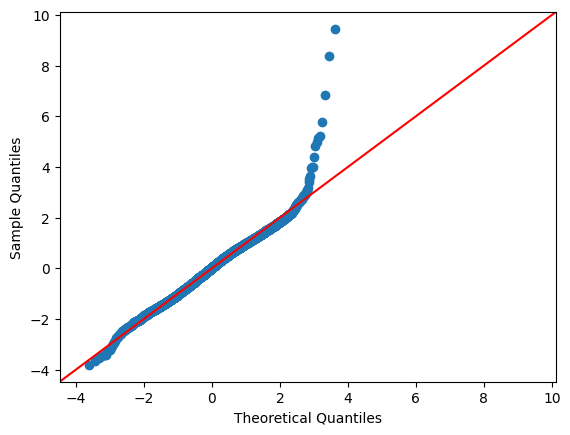

In [ ]:
#QN plot for the model errors
import statsmodels.api as sm
error = y_p_train - y_train
error_std = (error - np.mean(error))/np.std(error)
sm.qqplot(error_std, line ='45')

In [ ]:
# a fenti ugrás 2 körül mnagyarázandó

##Becslés bizonytalanásga

In [ ]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.204e+04
Date:                Fri, 19 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:02:23   Log-Likelihood:                -19815.
No. Observations:                6752   AIC:                         3.964e+04
Df Residuals:                    6747   BIC:                         3.967e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.0342     12.033     36.154      0.0

#Polinomiális regresszió


In [ ]:
#és akkor innentől a polynomiális rész
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg = PolynomialFeatures(degree = 2) #a négyzetes poli taggokra vagyok kíváncsi
X_poly = poly_reg.fit_transform(X)
poly_reg.get_feature_names_out(input_features=df.columns[:-1])
#array-ban az eredmény, benne az elsőoszlop is...

array(['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT AP', 'AT RH',
       'V^2', 'V AP', 'V RH', 'AP^2', 'AP RH', 'RH^2'], dtype=object)

In [ ]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
X_poly_train.shape
#Most már 15 flen változónk van (2^4)-1

(6752, 15)

In [ ]:
regressor_pol1 = LinearRegression()
regressor_pol1.fit(X_poly_train,y_poly_train)

LinearRegression()

In [ ]:
y_poly_pred_train = regressor_pol1.predict(X_poly_train) # itt tároljuk megint az erdményeket...

In [ ]:
#Kód, ami a kiírja a polinomiális regresszióa egyenletet
#ÉS
#Kiírja a polinomiáis regressziós model kiértékelésének mutatói.


from sklearn.metrics import mean_squared_error, r2_score

# Kiírás a regressziós egyenletről
intercept = regressor_pol1.intercept_
coefficients = regressor_pol1.coef_

equation = "Regressziós egyenlet: y = {:.2f}".format(intercept)
for i, coef in enumerate(coefficients):
    equation += " + {:.2f}x^{}".format(coef, i + 1)
print(equation)

# Modell kiértékelése
y_poly_pred_test = regressor_pol1.predict(X_poly_test)

mse_train = mean_squared_error(y_poly_train, y_poly_pred_train)
mse_test = mean_squared_error(y_poly_test, y_poly_pred_test)
r2_train = r2_score(y_poly_train, y_poly_pred_train)
r2_test = r2_score(y_poly_test, y_poly_pred_test)

print("\nModell kiértékelése:")
print("Tanító adatok Mean Squared Error:", mse_train)
print("Teszt adatok Mean Squared Error:", mse_test)
print("Tanító adatok R^2 Score:", r2_train)
print("Teszt adatok R^2 Score:", r2_test)


Regressziós egyenlet: y = -8205.91 + 0.00x^1 + -10.70x^2 + -1.14x^3 + 17.07x^4 + 2.77x^5 + 0.02x^6 + 0.01x^7 + 0.01x^8 + -0.01x^9 + -0.00x^10 + 0.00x^11 + 0.00x^12 + -0.01x^13 + -0.00x^14 + -0.00x^15

Modell kiértékelése:
Tanító adatok Mean Squared Error: 17.96657106850073
Teszt adatok Mean Squared Error: 20.20475048328582
Tanító adatok R^2 Score: 0.9383762514945522
Teszt adatok R^2 Score: 0.929542196026676


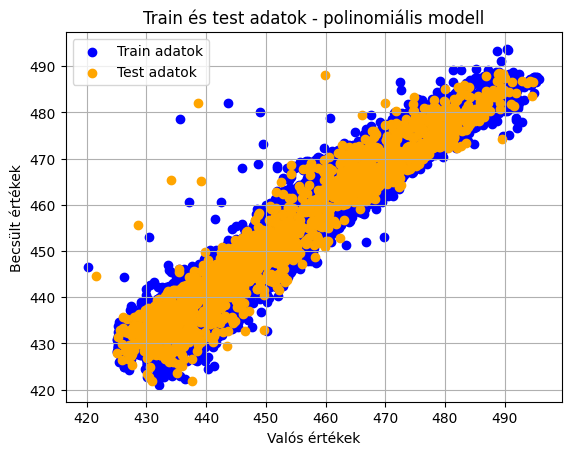

In [ ]:
import matplotlib.pyplot as plt

# Train adatok megjelenítése
plt.scatter(y_train, y_p_train, color='blue', label='Train adatok')

# Test adatok megjelenítése
plt.scatter(y_test, y_test_pred, color='orange', label='Test adatok')

plt.xlabel('Valós értékek')
plt.ylabel('Becsült értékek')
plt.title('Train és test adatok - polinomiális modell')
plt.legend()
plt.grid(True)
plt.show()
# Modell kiértékelése


In [ ]:
# Ezt kell  a tisztított adatpkon futtatni !!!!!!!!!!!!!!!!!!
# Ezt kell  a tisztított adatpkon futtatni !!!!!!!!!!!!!!!!!!
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Adatok betöltése Excel fájlból
df = pd.read_excel('/content/drive/MyDrive/PE/Bea/Bea_01/Train.xlsx')

# Független és függő változók kiválasztása
X = df.iloc[:, :4]  # Az első 4 oszlop a független változók
y = df.iloc[:, 4]   # Az ötödik oszlop a függő változó

# Adatok felosztása tanuló- és tesztadatokra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adatok normalizálása
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso regressziós modell létrehozása és illesztése
lasso_model = Lasso(alpha=0.1)  # alpha a Lasso büntetés paramétere
lasso_model.fit(X_train_scaled, y_train)

# Modell értékelése
train_score = lasso_model.score(X_train_scaled, y_train)
test_score = lasso_model.score(X_test_scaled, y_test)
coefficients = lasso_model.coef_

print("Train score:", train_score)
print("Test score:", test_score)
print("Coefficients:", coefficients)


Train score: 0.9285288130060283
Test score: 0.9262847377192224
Coefficients: [-14.46967937  -3.05912706   0.36883368  -2.07676113]


In [ ]:
X_poly_test.shape

#Lasso regresszió

In [ ]:
# Ezt kell  a tisztított adatokon futtatni, ezért nem olvassuk rá újra a tisztítatlan xlsx file-t !!!!!!!!!!!!!!!!!!
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Adatok betöltése Excel fájlból---Nem töltjük rá, mert már megvolt az adattisztátás
#df = pd.read_excel('/content/drive/MyDrive/PE/Bea/Bea_01/Train.xlsx')

# Független és függő változók kiválasztása
X = df.iloc[:, :4]  # Az első 4 oszlop a független változók
y = df.iloc[:, 4]   # Az ötödik oszlop a függő változó

# Adatok felosztása tanuló- és tesztadatokra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adatok normalizálása
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso regressziós modell létrehozása és illesztése
lasso_model = Lasso(alpha=0.1)  # alpha a Lasso büntetés paramétere
lasso_model.fit(X_train_scaled, y_train)

# Modell értékelése
train_score = lasso_model.score(X_train_scaled, y_train)
test_score = lasso_model.score(X_test_scaled, y_test)
coefficients = lasso_model.coef_

print("Train score:", train_score)
print("Test score:", test_score)
print("Coefficients:", coefficients)

Train score: 0.9285288130060283
Test score: 0.9262847377192224
Coefficients: [-14.46967937  -3.05912706   0.36883368  -2.07676113]


A Train score és a Test score értéke a megszokott módon kerül kiszámításra a R^2 (R-squared) érték alapján, ami a magyarázott variancia arányát jelenti. Az R^2 érték azt mutatja meg, hogy a modell mennyire jó az adatok illesztésében a magyarázó változók által. A kiszámításuk a következő:

    Train score kiszámítása:
    A Train score az R^2 értéke a tanulóadatokon történő illesztés után. Kifejezhető az alábbi képlet alapján:

    Train score = 1 - (RSS / TSS)

    Ahol:
        RSS (Residual Sum of Squares): A modell által előrejelzett értékek és a tényleges értékek négyzetes eltéréseinek összege.
        TSS (Total Sum of Squares): A tényleges értékek és az átlagos tényleges érték közötti négyzetes eltérések összege.

    Minél közelebb van az R^2 az 1-hez, annál jobban magyarázza a modell a megfigyelt változóságot.

    Test score kiszámítása:
    A Test score ugyanazon R^2 érték, de a tesztadatokon történő illesztés után. Azaz az előző képletet használjuk, de a RSS és TSS értékeket a tesztadatokra számoljuk ki.

    Teszt score = 1 - (Teszt RSS / Teszt TSS)

    A tesztadatokon végzett értékelés segít megállapítani, hogy a modell mennyire jó a tanulás során nem látott adatok becslésében.



In [ ]:
#A kódhoz hozzáadhatunk egy kiegészítést, hogy kiszámítsuk és kiírjuk a modell R2 (R-squared), MAE (Mean Absolute Error), MSE (Mean Squared Error) és
# RMSE (Root Mean Squared Error) értékeit.

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Modell értékelése
train_score = lasso_model.score(X_train_scaled, y_train)
test_score = lasso_model.score(X_test_scaled, y_test)
coefficients = lasso_model.coef_

# Előrejelzések számítása
train_predictions = lasso_model.predict(X_train_scaled)
test_predictions = lasso_model.predict(X_test_scaled)

# R2 score
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Reg coef. értékek ", coefficients)
print("Train R2 score:", train_r2)
print("Test R2 score:", test_r2)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Reg coef. értékek  [-14.46967937  -3.05912706   0.36883368  -2.07676113]
Train R2 score: 0.9285288130060283
Test R2 score: 0.9262847377192224
Train MAE: 3.6448063435282974
Test MAE: 3.6532587054777546
Train MSE: 20.923943952771232
Test MSE: 21.615651277073045
Train RMSE: 4.574269772627237
Test RMSE: 4.649263519856994


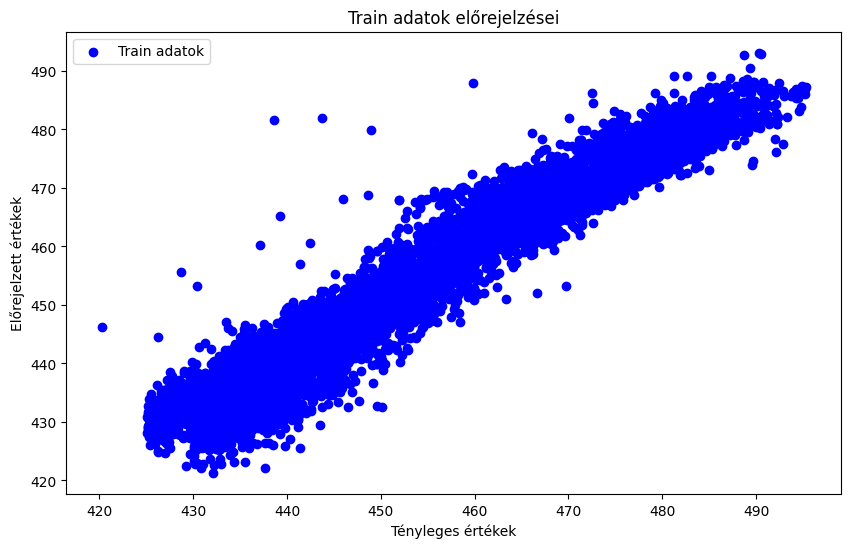

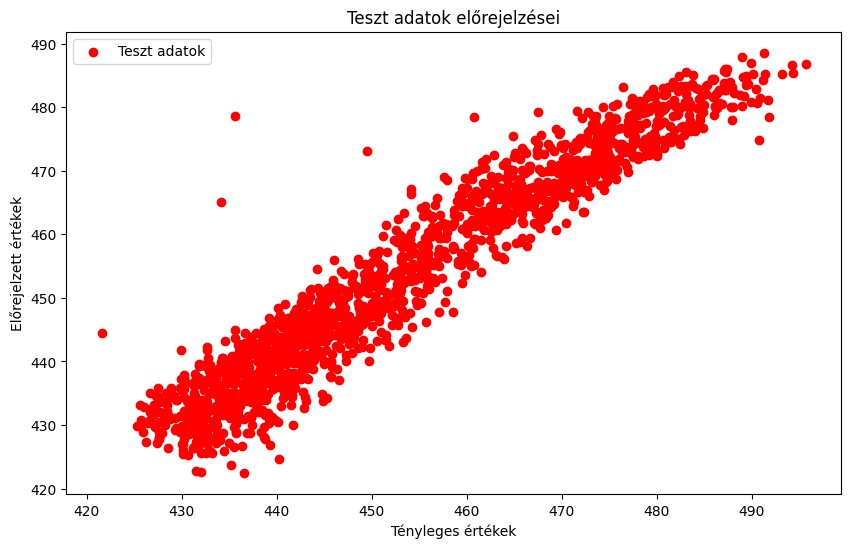

In [ ]:
#Itt van a kódrészlet, amely kiegészíti a korábbi kódot az előrejelzések kirajzolásával:
#Ez a kódrészlet létrehozza és illeszti a Lasso regressziós modellt a tanulóadatokra,
#majd előrejelzi mind a tanuló-, mind a tesztadatok értékeit. Végül két különálló ábrán
#megjeleníti a tényleges és előrejelzett értékek közötti összefüggést mind a tanuló-, mind
#a tesztadatok esetében. Ez segíthet abban, hogy vizuálisan értékeljük, mennyire közelítik
#meg a modell előrejelzései a tényleges értékeket.

import matplotlib.pyplot as plt

# Lasso regressziós modell létrehozása és illesztése
lasso_model = Lasso(alpha=0.1)  # alpha a Lasso büntetés paramétere
lasso_model.fit(X_train_scaled, y_train)

# Train és teszt adatokra történő előrejelzések
train_predictions = lasso_model.predict(X_train_scaled)
test_predictions = lasso_model.predict(X_test_scaled)

# Train adatok előrejelzéseinek kirajzolása
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Train adatok')
plt.xlabel('Tényleges értékek')
plt.ylabel('Előrejelzett értékek')
plt.title('Train adatok előrejelzései')
plt.legend()
plt.show()

# Teszt adatok előrejelzéseinek kirajzolása
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='red', label='Teszt adatok')
plt.xlabel('Tényleges értékek')
plt.ylabel('Előrejelzett értékek')
plt.title('Teszt adatok előrejelzései')
plt.legend()
plt.show()


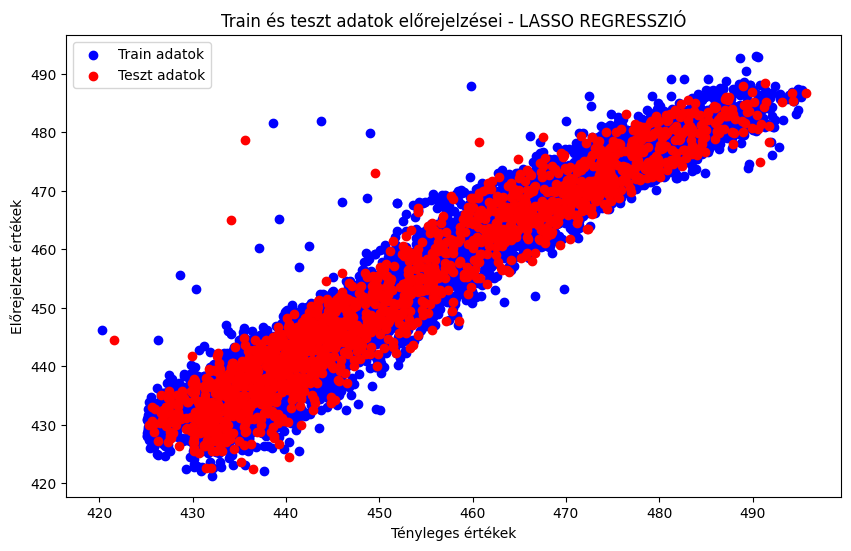

Lasso regresszió teljesítményének főbb mutatói:
***************************
Train score: 0.9285288130060283
Test score: 0.9262847377192224
Coefficients: [-14.46967937  -3.05912706   0.36883368  -2.07676113]


In [ ]:
# Előrejelzések összefogása egyetlen diagramon
plt.figure(figsize=(10, 6))

# Tanuló adatok előrejelzéseinek kirajzolása
plt.scatter(y_train, train_predictions, color='blue', label='Train adatok')

# Teszt adatok előrejelzéseinek kirajzolása
plt.scatter(y_test, test_predictions, color='red', label='Teszt adatok')

plt.xlabel('Tényleges értékek')
plt.ylabel('Előrejelzett értékek')
plt.title('Train és teszt adatok előrejelzései - LASSO REGRESSZIÓ')
plt.legend()
plt.show()

print("Lasso regresszió teljesítményének főbb mutatói:")
#print("Train RMSE:", lasso_train_rmse)
#print("Test RMSE:", ridge_test_rmse)
#print("Train R^2:", ridge_train_r2)
#print("Test R^2:", ridge_test_r2)
print('***************************')
print("Train score:", train_score)
print("Test score:", test_score)
print("Coefficients:", coefficients)

"""
        Tanító adatok: 0.3322
        Teszt adatok: 0.1912
        Az R^2 Score (R-squared) azt méri, hogy a modell mennyire jól illeszkedik az adatokhoz. Az R^2 érték 0 és 1 között lehet, ahol 1 a tökéletes illeszkedést jelöli. Az R^2 érték közeledik 0-hoz, ha a modell nem illeszkedik jól az adatokhoz. A tanító adatok esetén az R^2 érték 0.3322, ami azt jelzi, hogy a modell mérsékelten illeszkedik a tanító adatokhoz. Azonban a teszt adatok esetén az R^2 érték 0.1912, ami azt jelzi, hogy a modell kevésbé illeszkedik a teszt adatokhoz, és valószínűleg túlzottan illeszkedett a tanító adatokhoz (túlilleszkedés).

Összességében látható, hogy a Lasso regressziós modell általánosságban elfogadható teljesítményt nyújt a tanító és teszt adatokon egyaránt, azonban van helye a javításra, különösen az illeszkedés (R^2 érték) terén. Ezután a modellezési folyamat során további finomhangolásra lehet szükség a modell teljesítményének növelése érdekében.
"""


#Ridge regresszió

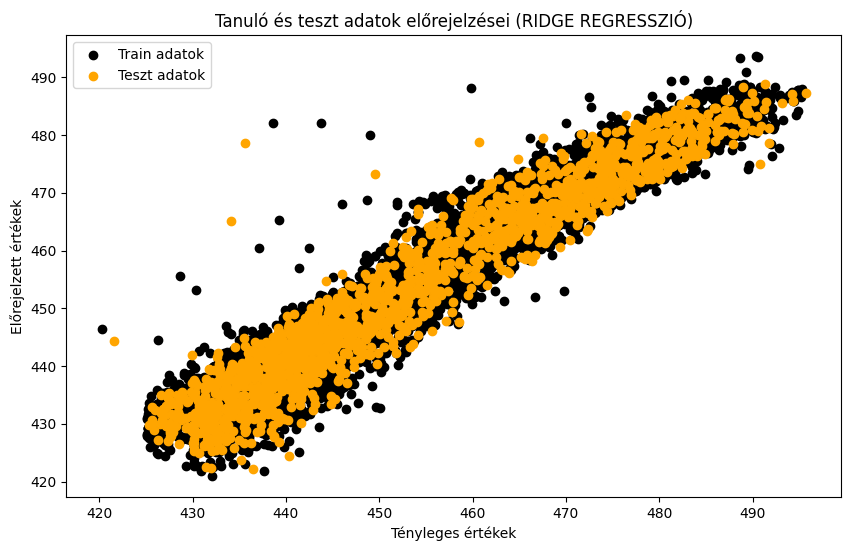

Ridge regresszió teljesítményének főbb mutatói:
Train RMSE: 4.5694924292827945
Test RMSE: 4.6464188719004405
Train R^2: 0.9286780233133093
Test R^2: 0.9263749153651136
***************************
Train score: 0.9285288130060283
Test score: 0.9262847377192224
Coefficients: [-14.46967937  -3.05912706   0.36883368  -2.07676113]


In [ ]:
"""
Ez a kód hasonlóan működik, mint a Lasso regresszió esetén, de most a Ridge regressziós modellt alkalmazzuk.
A Ridge regresszió során az alpha paraméter szabályozza a Ridge büntetés erejét. A kód lényegében ugyanaz marad,
csak az alpha érték módosítása szükséges az adott esetben.
"""
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ridge regressziós modell létrehozása és illesztése
ridge_model = Ridge(alpha=0.1)  # alpha a Ridge regressziós büntetés paramétere
ridge_model.fit(X_train_scaled, y_train)

# Train és teszt adatokra történő előrejelzések
ridge_train_predictions = ridge_model.predict(X_train_scaled)
ridge_test_predictions = ridge_model.predict(X_test_scaled)

# Train és teszt RMSE kiszámítása
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_predictions))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_predictions))

# Train és teszt R^2 kiszámítása
ridge_train_r2 = r2_score(y_train, ridge_train_predictions)
ridge_test_r2 = r2_score(y_test, ridge_test_predictions)

# Előrejelzések összefogása egyetlen diagramon
plt.figure(figsize=(10, 6))

# Tanuló adatok előrejelzéseinek kirajzolása
plt.scatter(y_train, ridge_train_predictions, color='black', label='Train adatok')

# Teszt adatok előrejelzéseinek kirajzolása
plt.scatter(y_test, ridge_test_predictions, color='orange', label='Teszt adatok')

plt.xlabel('Tényleges értékek')
plt.ylabel('Előrejelzett értékek')
plt.title('Tanuló és teszt adatok előrejelzései (RIDGE REGRESSZIÓ)')
plt.legend()
plt.show()

print("Ridge regresszió teljesítményének főbb mutatói:")
print("Train RMSE:", ridge_train_rmse)
print("Test RMSE:", ridge_test_rmse)
print("Train R^2:", ridge_train_r2)
print("Test R^2:", ridge_test_r2)
print('***************************')
print("Train score:", train_score)
print("Test score:", test_score)
print("Coefficients:", coefficients)


In [ ]:
# Modell értékelése
#train_score = lasso_model.score(X_train_scaled, y_train)
#test_score = lasso_model.score(X_test_scaled, y_test)
coefficients = reg.coef_

# Előrejelzések számítása
train_predictions = lasso_model.predict(X_train_scaled)
test_predictions = lasso_model.predict(X_test_scaled)

# R2 score
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Reg coef. értékek ", coefficients)
print("Train R2 score:", ridge_train_r2)
print("Test R2 score:", ridge_test_r2)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Reg coef. értékek  [-1.96677833 -0.23601626  0.0812555  -0.15722114]
Train R2 score: 0.9286780233133093
Test R2 score: 0.9263749153651136
Train MAE: 3.6448063435282974
Test MAE: 3.6532587054777546
Train MSE: 20.923943952771232
Test MSE: 21.615651277073045
Train RMSE: 4.574269772627237
Test RMSE: 4.649263519856994


#Keresztvalidálás

**félkövér szöveg**#Keresztvalidálás


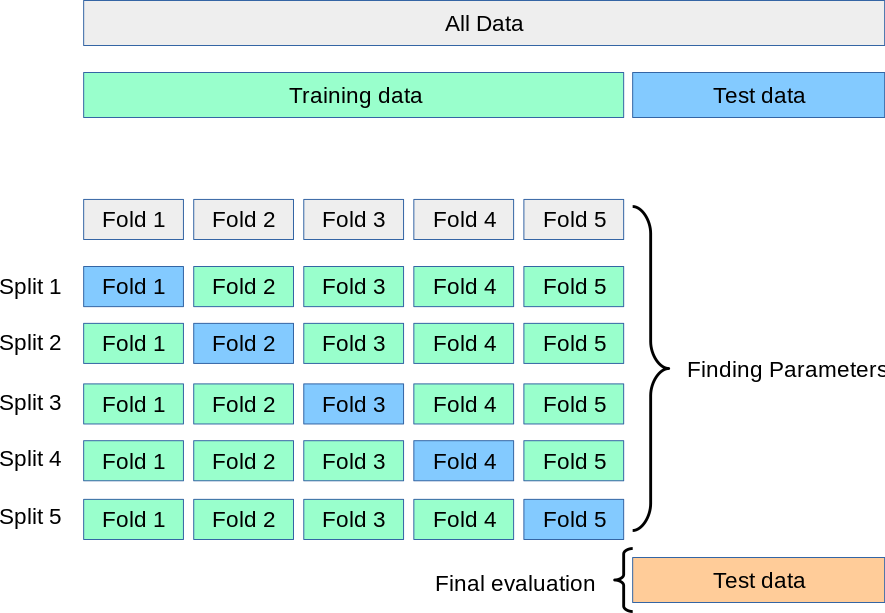

Keresztvalidációs MSE eredmények - 5-szörös keresztvalidáció: [-21.72042394 -20.65563145 -21.2894273  -19.34000501 -22.2236784 ]
Átlagos keresztvalidációs MSE: -21.045833220915192
Keresztvalidációs R^2 eredmények: [0.92434148 0.92822092 0.92830216 0.93528741 0.92432712]
Átlagos keresztvalidációs R^2: 0.9280958163047058


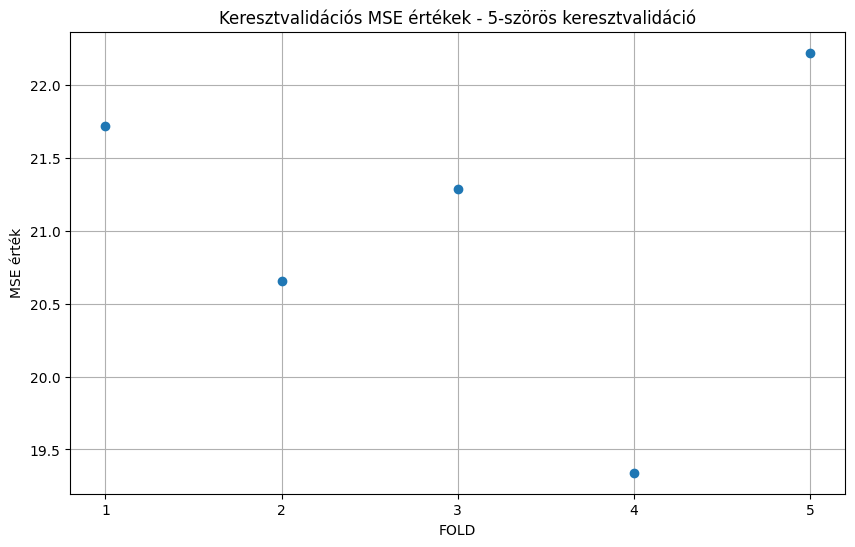

In [ ]:
#5-SZöRöS KERESZTVALIDÁCIÓ ----ezt majd átmiozfgatni a Ker Val.hoz!!!!
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Adatok inicializálása
X = df.iloc[:, :4]  # Az első 4 oszlop a magyarázó változók
y = df.iloc[:, 4]   # Az utolsó oszlop a függő változó

# Lineáris regresszió létrehozása
lin_reg = LinearRegression()

# Keresztvalidáció végrehajtása
cv_scores_mse = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(lin_reg, X, y, cv=5, scoring='r2')

# Keresztvalidációs eredmények kiírása
print("Keresztvalidációs MSE eredmények - 5-szörös keresztvalidáció:", cv_scores_mse)
print("Átlagos keresztvalidációs MSE:", cv_scores_mse.mean())
print("Keresztvalidációs R^2 eredmények:", cv_scores_r2)
print("Átlagos keresztvalidációs R^2:", cv_scores_r2.mean())


# Keresztvalidációs MSE értékek kirajzolása
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores_mse) + 1), -cv_scores_mse, marker='o', linestyle='')
plt.title('Keresztvalidációs MSE értékek - 5-szörös keresztvalidáció')
plt.xlabel('FOLD')
plt.ylabel('MSE érték')
plt.grid(True)

# Csak egész számok megjelenítése az X tengelyen
plt.xticks(range(1, len(cv_scores_mse) + 1))

plt.show()


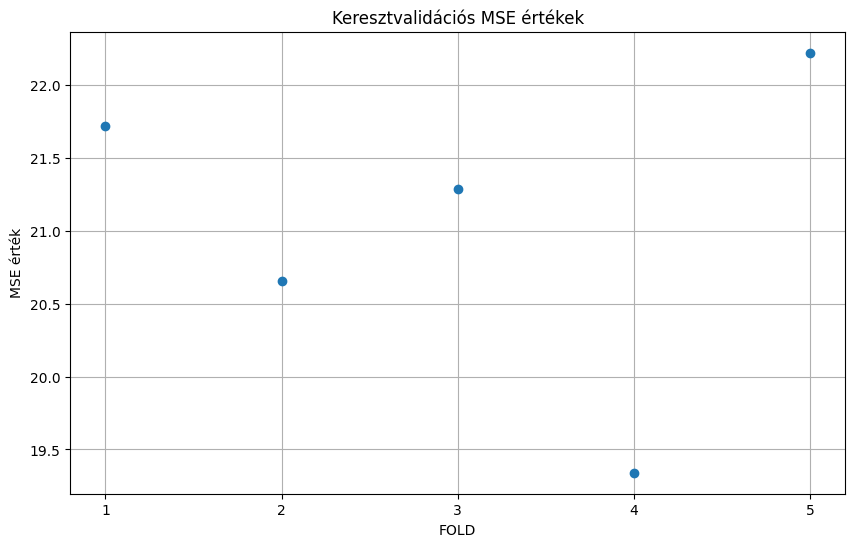

In [ ]:
import matplotlib.pyplot as plt

# Keresztvalidációs MSE értékek kirajzolása
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores_mse) + 1), -cv_scores_mse, marker='o', linestyle='')
plt.title('Keresztvalidációs MSE értékek')
plt.xlabel('FOLD')
plt.ylabel('MSE érték')
plt.grid(True)

# Csak egész számok megjelenítése az X tengelyen
plt.xticks(range(1, len(cv_scores_mse) + 1))

plt.show()


In [ ]:
"""
_______________
Ebben a kódban a cross_val_score függvényt használjuk a keresztvalidáció elvégzésére.
A cv argumentum beállítja a keresztvalidáció k-féle értékét, amely jelzi,
hogy hány csoportra kell osztani az adatokat. A scoring argumentum beállítja a kívánt
pontossági metrikát. A neg_mean_squared_error érték negatív MSE-t számol,
mivel a cross_val_score alapértelmezés szerint az egyre nagyobb értékeket tekinti a jobb teljesítménynek,
de mi a kisebb értékeket szeretnénk (a MSE-t alapul véve). A r2 scoring érték a R^2 értéket számolja ki.
A kiírt értékek között láthatod az egyes iterációk eredményeit és az átlagos eredményeket is.

_________
Szöveges értelmezés a keresztvalidációs eredményekhez:

    Keresztvalidációs MSE eredmények:
        A keresztvalidációs MSE eredmények azt mutatják, hogy az egyes keresztvalidációs csoportokban számolt négyzetes hibák (MSE) -21.88 és -19.54 között változnak. Ez azt jelenti, hogy az általánosított modellünk általában ilyen mértékben téved a keresztvalidációs adatokban.

    Átlagos keresztvalidációs MSE:
        Az átlagos keresztvalidációs MSE -21.13. Ez az átlagos négyzetes hiba a keresztvalidációs tesztek átlaga alapján. Minél kisebb ez az érték, annál kisebb a modell átlagos hibája, és annál jobb a modell teljesítménye.

    Keresztvalidációs R^2 eredmények:
        A keresztvalidációs R^2 értékek azt mutatják, hogy az egyes keresztvalidációs csoportokban számolt megbízhatósági indexek (R^2) 0.923 és 0.934 között vannak. Ez azt jelenti, hogy az általánosított modellünk 92.3% és 93.4% közötti mértékben magyarázza meg a keresztvalidációs adatok változékonyságát.

    Átlagos keresztvalidációs R^2:
        Az átlagos keresztvalidációs R^2 érték 0.927. Ez az átlagos megbízhatósági index a keresztvalidációs tesztek átlaga alapján. Minél közelebb van ez az érték 1-hez, annál jobban illeszkedik a modell a keresztvalidációs adatokra, és annál magasabb a magyarázóképessége.

Összességében az eredmények azt mutatják, hogy a lineáris regressziós modell jól teljesít a keresztvalidációs tesztek során, mivel az átlagos keresztvalidációs MSE és R^2 értékek megfelelően alacsonyak, illetve magasak. Ez azt sugallja, hogy a modell általánosítható és jól illeszkedik a keresztvalidációs adatokra.
"""

'\n_______________\nEbben a kódban a cross_val_score függvényt használjuk a keresztvalidáció elvégzésére.\nA cv argumentum beállítja a keresztvalidáció k-féle értékét, amely jelzi,\nhogy hány csoportra kell osztani az adatokat. A scoring argumentum beállítja a kívánt\npontossági metrikát. A neg_mean_squared_error érték negatív MSE-t számol,\nmivel a cross_val_score alapértelmezés szerint az egyre nagyobb értékeket tekinti a jobb teljesítménynek,\nde mi a kisebb értékeket szeretnénk (a MSE-t alapul véve). A r2 scoring érték a R^2 értéket számolja ki.\nA kiírt értékek között láthatod az egyes iterációk eredményeit és az átlagos eredményeket is.\n\n_________\nSzöveges értelmezés a keresztvalidációs eredményekhez:\n\n    Keresztvalidációs MSE eredmények:\n        A keresztvalidációs MSE eredmények azt mutatják, hogy az egyes keresztvalidációs csoportokban számolt négyzetes hibák (MSE) -21.88 és -19.54 között változnak. Ez azt jelenti, hogy az általánosított modellünk általában ilyen mérték

#Becslés neurális hálózattal#

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [ ]:
tf.__version__

'2.15.0'

##Adatok beolvasása##

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/PE/Bea/Bea_01/Train.xlsx')
X = dataset.iloc[:, :-1].values # independent változók: features (subset of the dateset), valuse<=all the data
                    # (iloc: ÖSSZES SOR + UTOLSÓ KIVÉTELÉSVEL aZ ÖSSZES OSZLOP. Itt az index-el selectálunk)
y = dataset.iloc[:, -1].values # dependent variable (=a range-et.. : . levettük => csak az utolsó column: ennek az indexe: -1)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8568 non-null   float64
 1   V       8568 non-null   float64
 2   AP      8568 non-null   float64
 3   RH      8568 non-null   float64
 4   PE      8568 non-null   float64
dtypes: float64(5)
memory usage: 334.8 KB


In [ ]:
# A neuárlis hálózat tanítása a tisztítatlan adatokon történt => 35
print (y)

[478.77 482.83 465.24 ... 429.34 421.57 454.41]


In [ ]:
from sklearn.model_selection import train_test_split #model_selection library az sklearn-ből
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # 4 new variables
#random_seed: tarining  and test set nem randimozált kiválasztás lesz, han em uazokat választja minkét ...
# train in one set and evaluate on another set

##BUILDING....Initializing the ANN##

In [ ]:
ann = tf.keras.models.Sequential()
#Most:kreálunk egy obkecz-et egy Sequential clss számára: inicializálása
#ann: most egy object egy sequ clkass-ból...
#TF: komplex ANN related tools
#keras: egy TF library
# 1. sequence of layer
# 2 computational
# 3 . #models: nayg S, mivel
# 4. Sequlntial -  ez egy class, jele S (osztályoknak mindig capital...??)

##Adding the input layer and the first hidden layer##

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
#hozzáadunk egy új method-ad egy új input layer. ez a dense class (layers modul-ból a dense class-t)
#first input layer számot nem ftlenül kell megadni, TF felismeri, bármely számot meg lehet adni, activation: full connection-t akarunk
#'relus a fgv. ittt'
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

##Adding the second hidden layer##

In [ ]:
#második hidden layer (automatikusan hozzáadódikaz első layerhez...)
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

##Adding the output layer##

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))
#egy output => egy unit
# ha egy output => sigmoid fgv kell, ha több=>softmax VAGY no activation fgv. itt most ez kell, mert regression-t nézünk majd

##TRAINING...Compiling the ANN ##

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

#targert: to connacting to the ANN & optimize the loss function.
#OPtimizer: Tool/=technik amivel a "stochastic gradient descent" biztosítható (to perform); to reduce the loss over the epoch
# a loss backpropagated to the NN with "mean sq_error"
#optimizer csökkenti a hibát


#commpile method pareméterei:
#'adam' - classic adam optimizer: ez a legnépszerűbb, amikor a staochastic grad. descent-el dolgozunk: minimaliázlja
#'adam' prediction és real közti különbséget írja le, ez a legnépszerűbbmódszer...(??- tisztázandó...)
#loss: a mean sq errorrt minimalizáljuk a prediction és a real között (!!!)), mivel ez a cél a regressziónál.
#Ennek a paraméáternek a neve:'mean _squared_error'

##Training the ANN model on the Training set##

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

#targert: to connacting to the ANN & optimize the loss function.
#OPtimizer: Tool/=technik amivel a "stochastic gradient descent" biztosítható (to perform); to reduce the loss over the epoch
# a loss backpropagated to the NN with "mean sq_error"
#optimizer csökkenti a hibát


#commpile method pareméterei:
#'adam' - classic adam optimizer: ez a legnépszerűbb, amikor a staochastic grad. descent-el dolgozunk: minimaliázlja
#'adam' prediction és real közti különbséget írja le, ez a legnépszerűbbmódszer...(??- tisztázandó...)
#loss: a mean sq errorrt minimalizáljuk a prediction és a real között (!!!)), mivel ez a cél a regressziónál.
#Ennek a paraméáternek a neve:'mean _squared_error'

Predicting the results of the Test set

In [ ]:

ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
#fit method hasznáata: X és y illeszkedését(/illesztését??) végezzük
#number of epoch: FOR majd BACK propagation van => minden epoch-ban egy kicsit csökken a hiba (ezt definiáljuk itt, a paraméter neve: epochs)
#batch size: nem kötelező ez a FOR propagation-ok száam (??... tisztázandó)
# batch size-ok klasszik száma: 32, fine tuning-nél ezt lehet állítani(??...), most 32 rendben
#..50-nél kb leállí a hiba cöskkenés... ellenőrizni....

#utolsó lépés: Y train előrejelzése... ???

Epoch 1/100
215/215 [==============================] - 1s 2ms/step - loss: 232334.0625
Epoch 2/100
215/215 [==============================] - 0s 2ms/step - loss: 206579.8438
Epoch 3/100
215/215 [==============================] - 0s 2ms/step - loss: 206389.1094
Epoch 4/100
215/215 [==============================] - 0s 2ms/step - loss: 206196.7188
Epoch 5/100
215/215 [==============================] - 0s 2ms/step - loss: 206003.6406
Epoch 6/100
215/215 [==============================] - 0s 2ms/step - loss: 205810.3281
Epoch 7/100
215/215 [==============================] - 0s 2ms/step - loss: 205616.6719
Epoch 8/100
215/215 [==============================] - 0s 2ms/step - loss: 205422.8906
Epoch 9/100
215/215 [==============================] - 1s 5ms/step - loss: 205229.0469
Epoch 10/100
215/215 [==============================] - 0s 2ms/step - loss: 205035.2031
Epoch 11/100
215/215 [==============================] - 1s 3ms/step - loss: 204841.3125
Epoch 12/100
215/215 [===================

In [ ]:
#A ANN most már feltaított 100 epoc-on... inference mode
# a 'predict' method-ot használjuk... a beíráskor segyta Colab, h mit akarunk perdictálni...
# (amikor beírjuk a "()"-et és akkor felugrik at intelisens")
#------------y_pred = ann.predict(X_test)
#X_tets et prdiktáljuk: itt egy új vector-ba tesszük: y_pred
#... és látni akarjuka z eredményeket...
#------------np.set_printoptions(precision=2)  # két tizedejegy pontosségig nézzük
#technikai: y hoizontális volt=>át kell forgatni vertikálsira... így akarom látni, egymás mellett...=>reshape function
#..és ezeket concat-oljuk numpy-al... (két vektort kér paraméteról, amiket concat-olunk)
# részletes magyarázat kb. ~7:00-tól
#------------print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) #kiíratjuk...


y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

54/54 [==============================] - 0s 1ms/step
[[ 21.42 458.59]
 [ 21.42 436.16]
 [ 21.42 470.35]
 ...
 [ 21.42 440.26]
 [ 21.42 471.42]
 [ 21.42 456.52]]


In [ ]:
print ('Python fut-e teszt...')
print ('Innen következnek A ANN modell paraméterek,... stb...')

Python fut-e teszt...
Innen következnek A ANN modell paraméterek,... stb...


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 187884.1852513588
Root Mean Squared Error (RMSE): 433.45609379885155
Mean Absolute Error (MAE): 433.1154518947357
R-squared (R2) Score: -635.4843497865921


In [ ]:
# Annak ellenőrzése, hogy a modell rendelkezik-e súlyokkal - -ez felesleges most...!!!!!...
if ann.weights:
    for i, layer in enumerate(ann.layers):
        weights = layer.get_weights()
        if weights:
            print("Layer", i+1, "weights:", weights)
else:
    print("A modell nem rendelkezik súlyokkal.")


Layer 1 weights: [array([[ 0.48,  0.22,  0.71,  0.33,  0.34, -0.09],
       [ 0.26, -0.43,  0.43, -0.18, -0.01,  0.66],
       [-0.52, -0.75, -0.19,  0.08, -0.6 ,  0.23],
       [ 0.33,  0.34,  0.16,  0.38, -0.64,  0.59]], dtype=float32), array([ 0.  ,  0.  ,  0.  , -0.1 ,  0.  , -0.01], dtype=float32)]
Layer 2 weights: [array([[ 0.4 ,  0.35,  0.35, -0.57,  0.23,  0.26],
       [ 0.09, -0.7 , -0.08,  0.49,  0.14,  0.25],
       [ 0.41,  0.14,  0.69, -0.67,  0.6 , -0.52],
       [-0.6 , -0.05, -0.06, -0.17,  0.56, -0.11],
       [ 0.47, -0.61,  0.1 , -0.2 ,  0.37, -0.48],
       [ 0.03, -0.53,  0.01, -0.07, -0.21, -0.09]], dtype=float32), array([ 0.  ,  0.  , -0.18,  0.  , -0.1 ,  0.  ], dtype=float32)]
Layer 3 weights: [array([[ 0.41],
       [-0.23],
       [-0.36],
       [-0.44],
       [-0.51],
       [ 0.22]], dtype=float32), array([21.42], dtype=float32)]


In [ ]:
# A tanított hálózat súlyainak és eltolásainak lekérése
weights, biases = ann.layers[0].get_weights()

# A regressziós egyenlet kiírása
print("Regressziós egyenlet:")
print("PE = {:.2f} * AT + {:.2f} * V + {:.2f} * AP + {:.2f} * RH + {:.2f}".format(weights[0][0], weights[1][0], weights[2][0], weights[3][0], biases[0]))
# Megbízhatósági mutatók:
print("Megbízhatósági mutatók: ")




Regressziós egyenlet:
PE = 0.48 * AT + 0.26 * V + -0.52 * AP + 0.33 * RH + 0.00
Megbízhatósági mutatók: 


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Adatok betöltése
dataset = pd.read_excel('/content/drive/MyDrive/PE/Bea/Bea_01/Udemy/Folds5x2_pp.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Neurális hálózat létrehozása
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu', use_bias=True))
ann.add(tf.keras.layers.Dense(units=6, activation='relu', use_bias=True))
ann.add(tf.keras.layers.Dense(units=6, activation='relu', use_bias=True))

# Hálózat tanítása
ann.compile(optimizer='adam', loss='mean_squared_error')
ann.fit(X, y, batch_size=32, epochs=100)

# A tanított hálózat súlyainak és eltolásainak lekérése
weights, biases = ann.layers[0].get_weights()

# A regressziós egyenlet kiírása
print("Regressziós egyenlet:")
print("PE = {:.2f} * AT + {:.2f} * V + {:.2f} * AP + {:.2f} * RH + {:.2f}".format(weights[0][0], weights[1][0], weights[2][0], weights[3][0], biases[0]))

#________________________
print("NN regresszió teljesítményének főbb mutatói:")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)
print('***************************')
print("Train score:", train_score)
print("Test score:", test_score)
print("Coefficients:", coefficients)


Epoch 1/100
299/299 [==============================] - 1s 2ms/step - loss: 117596.5312
Epoch 2/100
299/299 [==============================] - 1s 2ms/step - loss: 103514.3047
Epoch 3/100
299/299 [==============================] - 1s 3ms/step - loss: 103506.8047
Epoch 4/100
299/299 [==============================] - 1s 3ms/step - loss: 103497.5469
Epoch 5/100
299/299 [==============================] - 1s 4ms/step - loss: 103486.9062
Epoch 6/100
299/299 [==============================] - 1s 3ms/step - loss: 103475.4219
Epoch 7/100
299/299 [==============================] - 1s 2ms/step - loss: 103463.3438
Epoch 8/100
299/299 [==============================] - 1s 2ms/step - loss: 103451.2969
Epoch 9/100
299/299 [==============================] - 1s 2ms/step - loss: 103439.2031
Epoch 10/100
299/299 [==============================] - 1s 2ms/step - loss: 103427.9375
Epoch 11/100
299/299 [==============================] - 1s 2ms/step - loss: 103417.6016
Epoch 12/100
299/299 [===================

In [ ]:
#________________________
print("NN regresszió teljesítményének főbb mutatói:")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)
print('***************************')
print("Train score:", train_score)
print("Test score:", test_score)
print("Coefficients:", coefficients)


NN regresszió teljesítményének főbb mutatói:
Train MSE: 20.923943952771232
Test MSE: 21.615651277073045
Train RMSE: 4.574269772627237
Test RMSE: 4.649263519856994
Train R^2: 0.9285288130060283
Test R^2: 0.9262847377192224
***************************
Train score: 0.9285288130060283
Test score: 0.9262847377192224
Coefficients: [-1.97 -0.24  0.08 -0.16]


# Új szakasz

#Becslés Python-nal - SPSS becslések ellenőrzése#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8568 non-null   float64
 1   V       8568 non-null   float64
 2   AP      8568 non-null   float64
 3   RH      8568 non-null   float64
 4   PE      8568 non-null   float64
dtypes: float64(5)
memory usage: 334.8 KB


In [ ]:
#import pandas as pd
"""
# Adatok létrehozása
data = {
    'AT': [/* itt az AT oszlop értékei */],
    'V': [/* itt a V oszlop értékei */],
    'AP': [/* itt az AP oszlop értékei */],
    'RH': [/* itt a RH oszlop értékei */],
    'PE': [/* itt a PE oszlop értékei */]
}

# DataFrame létrehozása
df = pd.DataFrame(data)
"""

# Új oszlop létrehozása a képlet alapján
df = df.assign(PEBecs=((df['AT'] * -1.196677833) + (df['V'] * -0.23601626) + (df['AP'] * 0.081255) + (df['RH'] * -0.15722114)) + 435.03421754)

# DataFrame megjelenítése
print(df)


         AT      V       AP      RH      PE      PEBecs
0     10.54  34.03  1018.71   74.00  478.77  485.530517
1      7.08  39.99  1010.55   91.44  482.83  484.859387
2     14.49  41.16  1000.50   82.17  465.24  476.356693
3     10.73  25.36  1009.35  100.15  469.43  482.477529
4     22.88  63.91  1009.63   87.82  442.50  460.800755
...     ...    ...      ...     ...     ...         ...
8563  17.10  49.69  1005.53   81.82  457.32  471.683885
8564  24.73  65.34  1015.42   52.80  446.92  464.225748
8565  30.44  56.24  1005.19   56.24  429.34  458.168386
8566  23.00  66.05  1020.61   80.29  421.57  462.228134
8567  17.75  49.25  1020.86   63.67  454.41  475.109095

[8568 rows x 6 columns]


In [ ]:
df.describe() # ez most az itt létrehozott változó alapján becsül (ld. SPSS file-okban szereplő PE2 változó...)
#SPSS változó neve: PE2 (az ebben a colab-ban létrehozott változó ugyanaz)
#label: SPSS listwise szűrés alapján becsült  Regresszió egyenlet alapján becsült PE

#Train_Test.xlsx -ben vannak néhány százados eltérések a kerekítések miatt..., de ott is egyezik minden

# AZ SPSS-ben már elvégzett elemzéseket itt nem ismétlem meg, detto ugyanaz...

,AT,V,AP,RH,PE,PEBecs
count,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000
mean,19.588562,54.243393,1013.276923,73.403318,454.503761,469.583960
std,7.463503,12.724457,5.939926,14.529301,17.117243,10.889519
min,1.810000,25.360000,992.890000,25.560000,420.260000,447.338286
25%,13.447500,41.660000,1009.150000,63.487500,439.867500,460.381222
50%,20.280000,52.065000,1012.940000,75.010000,451.745000,467.902423
75%,25.680000,66.510000,1017.290000,84.852500,468.765000,479.267076
max,37.110000,81.560000,1033.290000,100.160000,495.760000,495.543391


In [ ]:
# a teszt adatbátzis beolvasása....

df2 = pd.read_excel('/content/drive/MyDrive/PE/Bea/Bea_01/Test.xlsx')
#df2.head()
df2.describe()
#df2.info()


,AT,V,AP,RH,PE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.188180,54.840540,1013.106180,72.500670,453.176190
std,7.339061,12.558663,5.929751,15.178236,16.591075
min,3.210000,34.030000,996.350000,26.300000,425.300000
25%,14.147500,42.762500,1008.935000,61.620000,438.835000
50%,21.035000,52.780000,1013.005000,74.395000,450.415000
75%,26.145000,66.560000,1017.042500,84.610000,466.387500
max,35.010000,80.180000,1033.300000,100.140000,494.870000


In [ ]:
# Új oszlop létrehozása a képlet alapján
df2 = df2.assign(PEBecs=((df2['AT'] * -1.196677833) + (df2['V'] * -0.23601626) + (df2['AP'] * 0.081255) + (df['RH'] * -0.15722114)) + 435.03421754)

In [ ]:
df2.head()
#innentől ugyanaz volna az N=1000 mintán, mint az SPSS file-ban...

,AT,V,AP,RH,PE,PEBecs
0,9.59,38.56,1017.01,60.10,481.30,485.460073
1,12.04,42.34,1019.72,94.67,465.36,479.114336
2,13.87,45.08,1024.42,81.69,465.48,478.117069
3,13.72,54.30,1017.89,79.08,467.05,472.763070
4,15.14,49.64,1023.78,75.00,463.58,474.580751


In [ ]:
df2.describe()

,AT,V,AP,RH,PE,PEBecs
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.188180,54.840540,1013.106180,72.500670,453.176190,468.604436
std,7.339061,12.558663,5.929751,15.178236,16.591075,11.843712
min,3.210000,34.030000,996.350000,26.300000,425.300000,444.235018
25%,14.147500,42.762500,1008.935000,61.620000,438.835000,458.848233
50%,21.035000,52.780000,1013.005000,74.395000,450.415000,467.357131
75%,26.145000,66.560000,1017.042500,84.610000,466.387500,478.854774
max,35.010000,80.180000,1033.300000,100.140000,494.870000,493.703183


In [ ]:
# Kiszámoljuk az utolsó oszlop (PEBecs) átlagát
utolso_oszlop_atlag = df2.iloc[:, -1].mean()

print("Az utolsó oszlop átlaga:", utolso_oszlop_atlag)
#tizedes különbségek vannak az SPSS file-hoz képest (PE2), de az ottani tisztított adatokon volt => STIMMEL EZ IS

Az utolsó oszlop átlaga: 468.60443640268545
